In [1]:
import pickle
with open('models_KNN_and_SGD_verbose.pickle', 'rb') as handle:
    models_1 = pickle.load(handle)

C:\Users\Saltp\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Saltp\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Saltp\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RBFSampler from version 1.4.2 when using version 1.5.1. This might lead to breaking cod

In [2]:
models_1[' point']

{'train': {30: {'X_train': array([[44.3451, -68.2389, 4.618086441382969, ..., 0.006497499999999989,
           0.0046549999999999925, 0.002454999999999985],
          [44.076389, -88.500003, 5.422744944923089, ...,
           0.0002274999999999916, 0.001354999999999995,
           0.002124999999999988],
          [44.21124, -96.063859, 6.250168226698564, ...,
           0.007212499999999983, 0.010237499999999983, 0.008669999999999983],
          ...,
          [46.987964, -94.932215, 6.078559239974039, ..., 0.027865,
           0.031494999999999995, 0.028799999999999992],
          [46.352393, -95.647923, 6.0063531596017325, ...,
           0.008119999999999988, 0.007982500000000003, 0.007047499999999984],
          [46.9675, -94.8622, 6.077642243349034, ..., 0.002014999999999989,
           0.0013825000000000087, 0.0016025000000000067]], dtype=object),
   'X_test': array([[45.356512, -93.335752, 5.614951260949585, ...,
           0.004737500000000006, 0.003857499999999986, 0.003637499

In [3]:
import pickle
with open('models_XG_and_Linear.pickle', 'rb') as handle:
    models_2 = pickle.load(handle)

In [ ]:
models_2[' median'][;

In [5]:
from pathlib import Path
import pickle
root = Path(r'Feature_importance.ipnyb').absolute().parent.parent.parent
with open(str(root)+r"\data\processed_data\0.4_dataset_preprocessing.pickle",'rb') as handle:
    dataset = pickle.load(handle) 

In [57]:
dataset[' median']['train'][30]['X_test'].shape

(6927, 35)

In [ ]:
independent_vars = ['source_samplesite_lat_dd','source_samplesite_lon_dd','lake_elevation_m','lake_totalarea_ha','lake_elevation_m','lake_shorelinedevfactor','month','year','lake_mix_layer_temperature',
       'lake_mix_layer_temperature_min', 'lake_mix_layer_temperature_max',
       'lake_mix_layer_depth', 'lake_mix_layer_depth_min',
       'lake_mix_layer_depth_max', 'u_component_of_wind_10m',
       'u_component_of_wind_10m_min', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m', 'v_component_of_wind_10m_min',
       'v_component_of_wind_10m_max', 'total_precipitation_sum',
       'total_precipitation_min', 'total_precipitation_max',
       'surface_net_solar_radiation_sum', 'surface_net_solar_radiation_min',
       'surface_net_solar_radiation_max','SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7']

In [19]:
#Feature importance
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
independent_vars = ['source_samplesite_lat_dd','source_samplesite_lon_dd','lake_elevation_m','lake_totalarea_ha','lake_elevation_m','lake_shorelinedevfactor','month','year','lake_mix_layer_temperature',
       'lake_mix_layer_temperature_min', 'lake_mix_layer_temperature_max',
       'lake_mix_layer_depth', 'lake_mix_layer_depth_min',
       'lake_mix_layer_depth_max', 'u_component_of_wind_10m',
       'u_component_of_wind_10m_min', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m', 'v_component_of_wind_10m_min',
       'v_component_of_wind_10m_max', 'total_precipitation_sum',
       'total_precipitation_min', 'total_precipitation_max',
       'surface_net_solar_radiation_sum', 'surface_net_solar_radiation_min',
       'surface_net_solar_radiation_max','SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7']
dependent_var = 'parameter_value'
num_to_param = {30:'secchi_m',9:'chla_ugl',21:'tn_ugl',23:'do_mgl',25:'ph',27:'tp_ugl',31:'sio2_mgl',48:'salinity_ppm'}


from sklearn.metrics import root_mean_squared_error

def n_RMSE(y_true,y_pred):
    return -root_mean_squared_error(y_true,y_pred)/np.mean(y_true)

from sklearn.metrics import make_scorer

normalized_RMSE = make_scorer(n_RMSE)

def permute_importance(dataset, reduction_method, key, model,model_name):
    dataset_split = dataset[reduction_method]['train'][key]
    
    feature_importance = permutation_importance(model,dataset_split['X_test'], dataset_split['y_test'],n_repeats=50,random_state=42, scoring = normalized_RMSE)
    print(feature_importance.importances_mean)
    fig, ax = plt.subplots()
    ax.barh(independent_vars,feature_importance.importances_mean)
    ax.invert_yaxis()
    ax.set_title(reduction_method + model_name+" "+num_to_param[key]+" feature importance")
    plt.show()

In [20]:
X=dataset[' median']['train'][30]['X_test']

In [37]:
X=X.astype(np.float16)

In [49]:
import pandas as pd
pd.DataFrame(X, columns = independent_vars)

ValueError: Shape of passed values is (6927, 35), indices imply (6927, 33)

ValueError: Distance matrix 'X' must be symmetric.

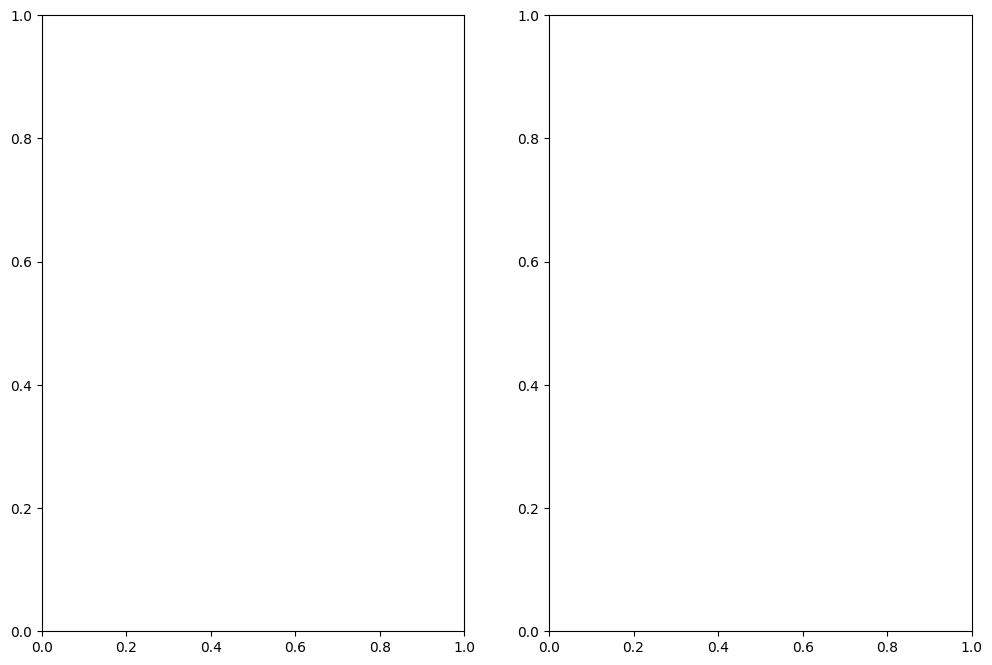

In [43]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()

In [ ]:
blocks = [['source_samplesite_lat_dd'],['source_samplesite_lon_dd'],['lake_elevation_m'],['lake_totalarea_ha'],['lake_perimeter_m'],['lake_shorelinedevfactor'],['month'],]'year'],['lake_mix_layer_temperature',
       'lake_mix_layer_temperature_min', 'lake_mix_layer_temperature_max'],[
       'lake_mix_layer_depth', 'lake_mix_layer_depth_min',
       'lake_mix_layer_depth_max'], ['u_component_of_wind_10m',
       'u_component_of_wind_10m_min', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m', 'v_component_of_wind_10m_min',
       'v_component_of_wind_10m_max'], ['total_precipitation_sum',
       'total_precipitation_min', 'total_precipitation_max'],
       ['surface_net_solar_radiation_sum', 'surface_net_solar_radiation_min',
       'surface_net_solar_radiation_max'],['SR_B1'],['SR_B2'],['SR_B3'],['SR_B4'],['SR_B5'],['SR_B6'],['SR_B7']]
block = [['


custom_permute_importance(model, X_test, y_test):



[4.75895842e-02 3.46232970e-02 1.63505263e-02 5.80154683e-03
 0.00000000e+00 0.00000000e+00 4.75428621e-03 4.85803455e-03
 7.83713949e-04 1.32699902e-03 4.03537512e-04 1.11563897e-03
 6.41407615e-04 5.73543347e-04 4.77769866e-04 3.48962790e-03
 1.38697216e-04 3.79517070e-04 7.82420282e-05 2.20798769e-04
 4.94872990e-04 2.76678137e-04 1.28314955e-04 5.49068054e-05
 1.91440535e-04 3.73967945e-04 0.00000000e+00 4.54245618e-04
 2.25060089e-02 7.49685566e-02 6.09847884e-02 2.69758185e-01
 1.93079364e-02 4.94328621e-02 1.15786108e-02]


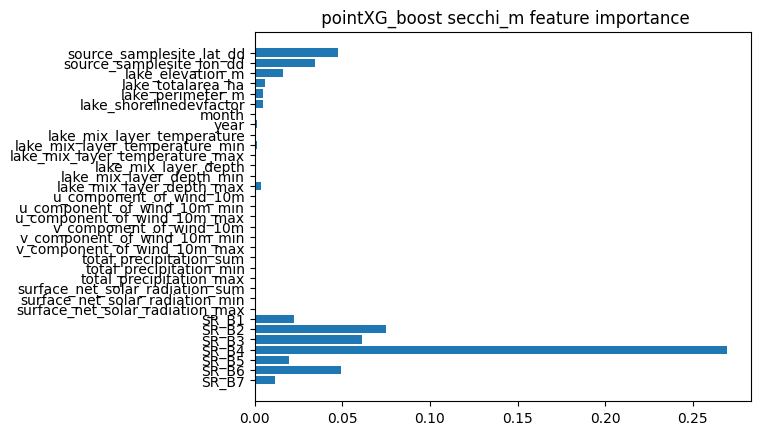

[5.40669357e-02 4.55086576e-02 2.31176586e-02 7.12062249e-03
 0.00000000e+00 0.00000000e+00 6.00885074e-03 7.66909924e-03
 1.49108367e-03 2.42061848e-03 5.27311150e-04 9.00104387e-04
 3.48913765e-04 1.17527022e-03 5.55464526e-04 2.28387765e-03
 3.01049632e-05 6.58306626e-06 1.77581610e-04 1.33007139e-04
 9.56442904e-05 6.97108162e-06 1.12221248e-04 1.46531416e-05
 3.43252800e-04 2.72344429e-04 0.00000000e+00 3.19178587e-04
 3.15361708e-02 8.89091842e-02 3.45811749e-02 2.30343411e-01
 7.76505434e-03 3.91155660e-03 4.73780136e-02]


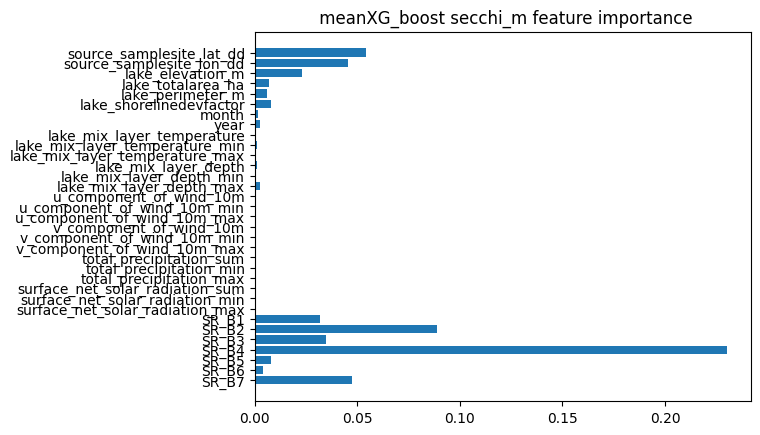

[ 5.30348516e-02  3.45097501e-02  1.42449157e-02  5.25147514e-03
  0.00000000e+00  0.00000000e+00  4.22307434e-03  4.44747554e-03
  9.64773913e-04  1.58251379e-03  4.91885791e-04  1.43188614e-03
  7.50500569e-04  1.24383179e-03  1.80219193e-04  2.07258950e-03
  2.27914950e-04 -6.99932418e-05 -5.31390087e-05  1.36700266e-04
  1.78305216e-04  3.28405957e-04  2.87432663e-04 -9.35909110e-07
  3.25514028e-04  4.30497583e-04  0.00000000e+00  6.58699454e-04
  2.28424285e-02  7.95432300e-02  6.24621833e-02  2.60224917e-01
  1.84713950e-02  5.14609758e-02  8.70157158e-03]


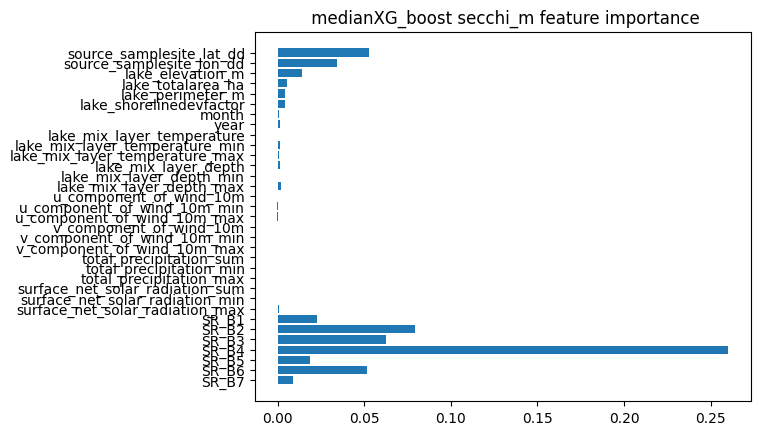

[ 1.98552376e-02  1.20365909e-02  7.76250144e-03  3.96997447e-03
  0.00000000e+00  0.00000000e+00  5.71971970e-03  3.45576730e-03
  5.74157421e-03  1.77459567e-03  4.49698247e-04  1.96211389e-03
  3.81623226e-04  1.41503468e-03  8.23912637e-04  2.42083057e-03
  6.75668354e-04  1.34581022e-04 -2.22186305e-04  2.44171472e-03
  9.35402328e-04  3.46005840e-04  7.29180312e-04  3.64339193e-05
  4.37041932e-04  2.12341613e-03  0.00000000e+00  7.34471469e-04
  1.82387933e-03  5.94883799e-02  6.64936057e-03  2.66579785e-01
  2.90020753e-02  1.78695729e-02  3.94896812e-02]


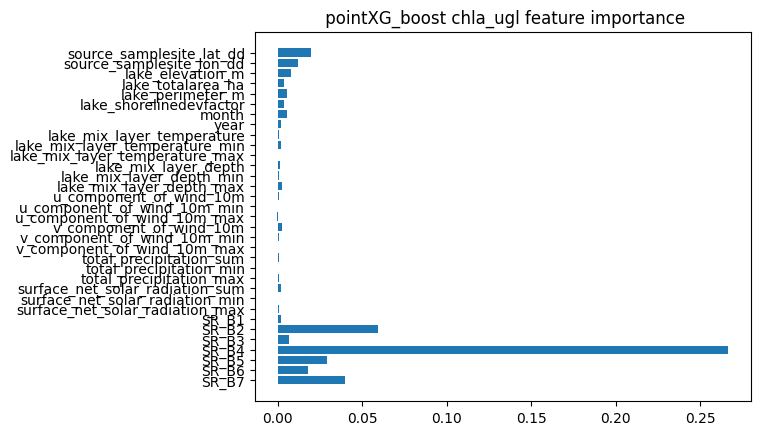

[ 2.43013959e-02  1.89031721e-02  6.40417656e-03  2.53598651e-03
  0.00000000e+00  0.00000000e+00  4.74610914e-03  5.57064578e-03
  9.95913482e-03  2.07640895e-03  4.02460661e-04  9.06281542e-04
  5.28628786e-04  1.12612041e-03  1.03639134e-03  2.08376345e-03
  4.24983275e-04  1.06383679e-03  1.67877936e-05  1.51143570e-03
  1.01082039e-03  4.09132011e-06  4.48911794e-04 -1.22247664e-05
  6.12095338e-04  2.68273653e-03  0.00000000e+00  1.04647679e-03
  6.99491229e-03  8.93489681e-02  1.23401857e-02  2.69532719e-01
  1.22225282e-02  5.58336432e-03  3.87184755e-02]


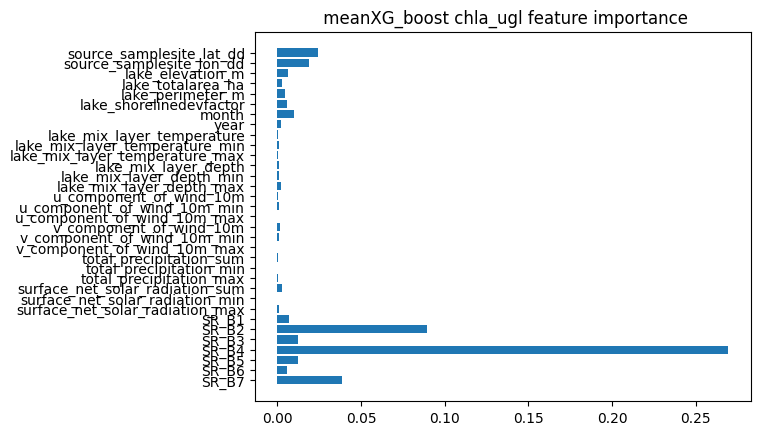

[ 1.71095439e-02  1.09005264e-02  3.81502547e-03  2.02255229e-03
  0.00000000e+00  0.00000000e+00  3.87049002e-03  4.03937667e-03
  5.94848418e-03  1.28041769e-03  8.26491283e-04  1.40483332e-03
  9.03967677e-05  1.10545811e-03  8.77053219e-04  1.87351760e-03
  1.25187476e-04  3.32866622e-04 -1.40704375e-04  9.55347352e-04
  3.09362522e-04  7.61132016e-04  3.69177258e-04 -2.77817664e-05
  3.25827301e-04  2.18634079e-03  0.00000000e+00  7.35496010e-04
  2.76077064e-03  6.70520676e-02  1.15037956e-02  2.59650629e-01
  2.77641618e-02  1.57232851e-02  2.40427567e-02]


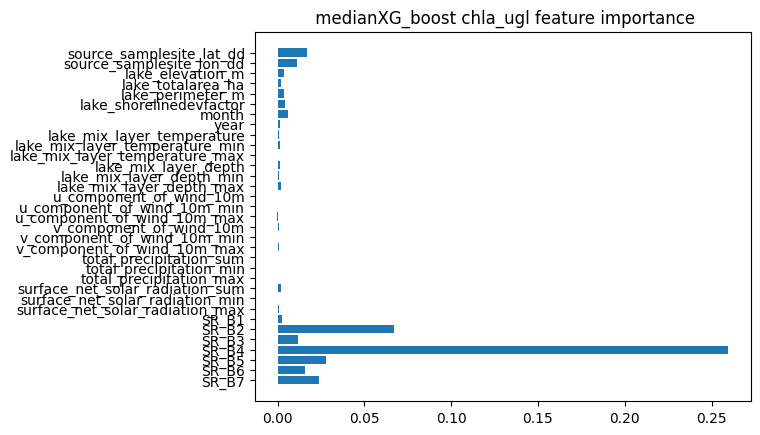

[ 1.28807832e-02  2.55860742e-02  2.45373909e-02  2.09184007e-03
  0.00000000e+00  0.00000000e+00  2.33375188e-03  1.55231054e-03
  2.38012718e-04  2.05691071e-04  4.09111320e-04  3.82548303e-04
  6.93166397e-05  1.75663627e-03  2.57029392e-04  1.07871153e-03
 -6.35902821e-04  2.60546158e-04 -4.74548221e-04 -1.41389556e-04
  2.10821303e-04  4.28034489e-04 -4.72194157e-04 -2.04083349e-06
  3.28686451e-05 -1.59133681e-05  0.00000000e+00 -6.65462800e-05
  9.33902613e-04  9.09330320e-04  1.61585950e-03  1.38833101e-02
  1.03379414e-04  2.03311323e-04  1.71470310e-04]


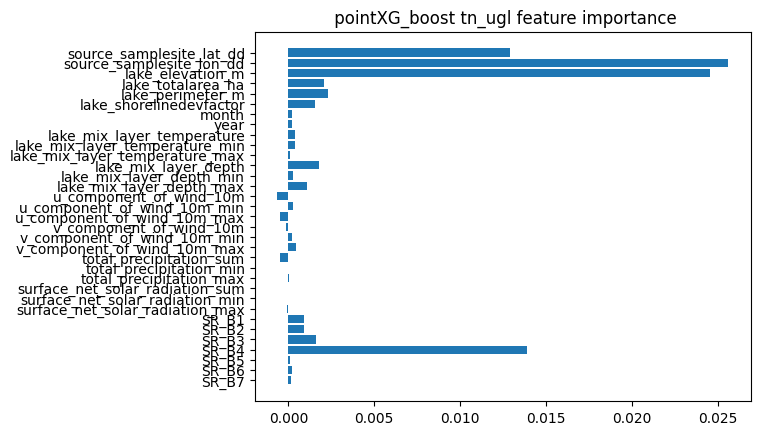

[ 0.01376581  0.02068279  0.02465174  0.00055623  0.          0.
  0.00168059  0.00211938 -0.00024952  0.00027014  0.00050112  0.00048126
  0.00032465  0.00214555  0.00056762  0.00226343  0.00065128  0.00069333
 -0.0002126   0.00013137  0.00046707  0.00057903 -0.00028156  0.
 -0.00022342  0.00049193  0.          0.00017644  0.00089706  0.00167622
  0.00171727  0.01385653  0.0006752  -0.00032548  0.00054817]


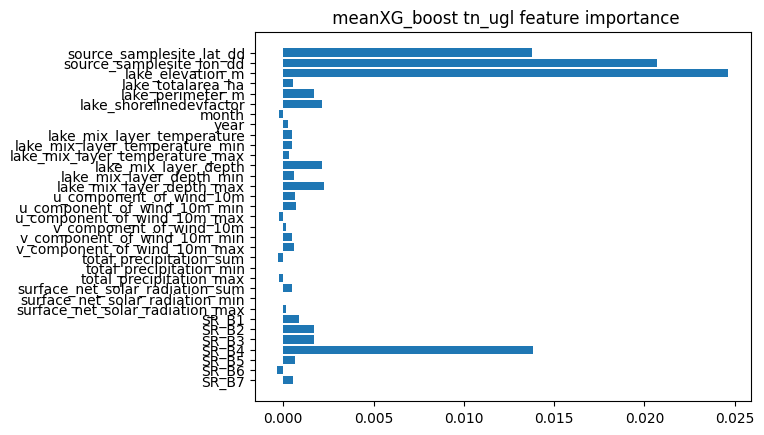

[ 1.37696089e-02  2.34298904e-02  2.28864974e-02  1.26962967e-03
  0.00000000e+00  0.00000000e+00  2.08527680e-03  7.38506005e-04
  3.28608164e-04 -5.80089115e-05  3.41167760e-04  2.80824714e-04
 -1.72159249e-04  9.28787613e-04  3.37117498e-04  1.97505374e-03
 -8.94083273e-04  2.30884541e-04  3.30935783e-04 -2.49424895e-04
  3.67420243e-04 -5.10928995e-05 -4.89776860e-07  4.29332655e-07
 -6.35177395e-05 -1.80355862e-05  0.00000000e+00  2.15310040e-04
  1.10577873e-03  1.25359902e-03  1.00922468e-03  1.75263962e-02
  2.56731761e-04  6.28801831e-05 -6.40641855e-04]


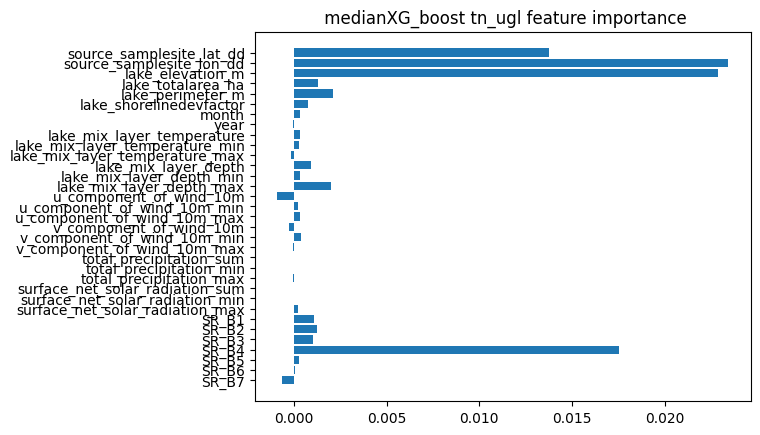

[ 1.10847822e-02  2.17303544e-03  5.52420750e-03  1.99419418e-03
  0.00000000e+00  0.00000000e+00  1.28976087e-03  1.28816156e-03
  8.70905857e-03  2.35215591e-04  7.43626554e-03  3.58277643e-03
  3.35922298e-03  3.79284941e-04  2.32098077e-03  1.12822396e-03
  8.74668545e-04  2.00467343e-04  5.96014552e-04  2.46898325e-03
  1.31947824e-03 -2.45110940e-04  8.33366118e-04 -3.44976639e-05
  3.84623124e-04  3.50981088e-03  0.00000000e+00  3.40749541e-03
  5.51344359e-04  2.72259288e-03  2.49185254e-02  2.09736045e-03
  4.17503381e-03  6.44272046e-04  7.68761193e-04]


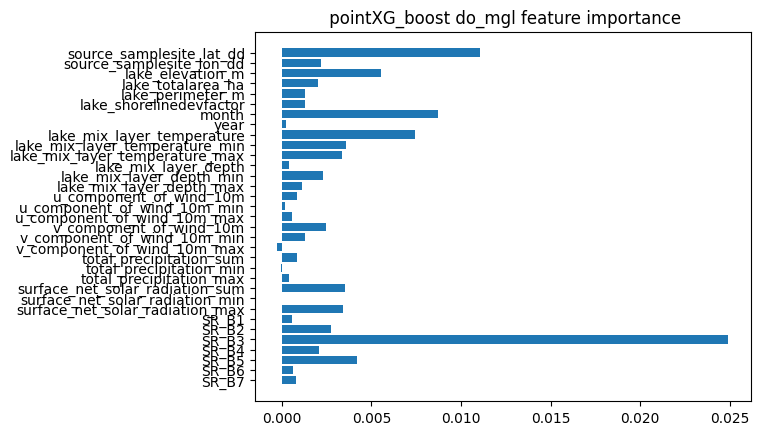

[1.19426544e-02 3.10999716e-03 4.88451852e-03 2.81536991e-03
 0.00000000e+00 0.00000000e+00 1.26228608e-03 2.97646096e-03
 1.01404554e-02 2.37222174e-04 6.10728887e-03 4.16993212e-03
 4.56512476e-03 8.53355378e-04 5.08992375e-04 1.32859984e-03
 1.72658491e-03 4.50657036e-04 1.84996664e-04 7.42813128e-04
 8.05852389e-04 2.06686682e-03 6.95536322e-04 6.40457944e-06
 4.76578790e-04 2.46597861e-03 0.00000000e+00 3.75139910e-03
 2.46470287e-04 8.61699248e-04 2.11737105e-02 1.76618516e-03
 5.34516892e-03 5.11051666e-03 1.81867594e-03]


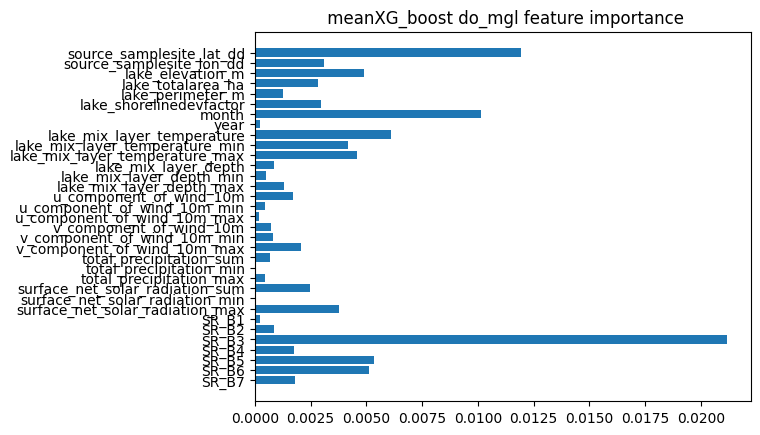

[9.69100183e-03 2.07562272e-03 4.34349310e-03 1.85166094e-03
 0.00000000e+00 0.00000000e+00 1.76600032e-03 3.19957154e-03
 8.00579401e-03 1.16159397e-04 7.65063894e-03 4.08848809e-03
 1.32974716e-03 4.63215861e-04 6.53569317e-04 3.00759727e-04
 6.08384697e-04 1.08539787e-04 1.20756312e-04 9.60950377e-04
 1.35033434e-03 8.19582369e-04 1.05260752e-03 8.93118953e-05
 4.28698695e-04 3.95520517e-03 0.00000000e+00 2.36659488e-03
 8.05456172e-04 9.63268550e-04 2.08692809e-02 1.41076314e-03
 3.60109072e-03 9.69842367e-04 2.75066734e-04]


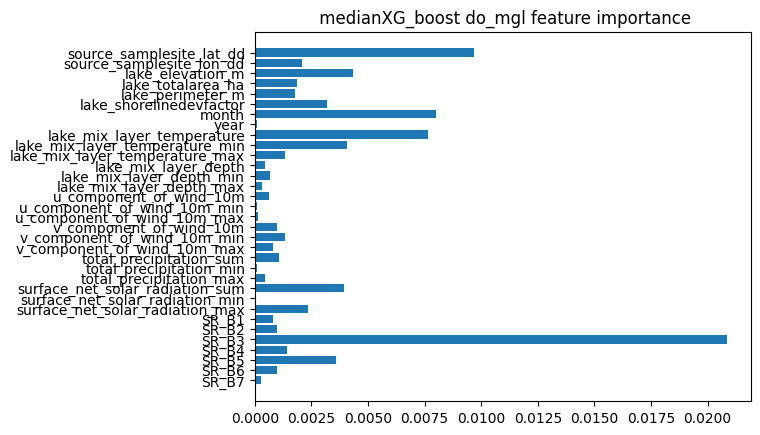

[1.50272640e-02 2.78730808e-02 1.08463285e-02 3.46887750e-03
 0.00000000e+00 0.00000000e+00 4.03583914e-03 2.54981413e-03
 4.98188336e-04 2.03238871e-04 8.58441252e-05 9.85746065e-04
 5.95742098e-04 4.94538524e-04 5.19557159e-04 2.66395778e-04
 1.38448027e-04 3.40757084e-04 4.15609481e-04 1.16942242e-04
 1.78842206e-04 2.18855574e-04 6.23187610e-04 6.94681893e-05
 4.72985817e-04 4.70459475e-04 0.00000000e+00 4.44299988e-04
 9.55682211e-04 6.00800072e-04 2.02337530e-02 1.03274609e-03
 1.42179659e-03 5.35039464e-04 6.59454226e-04]


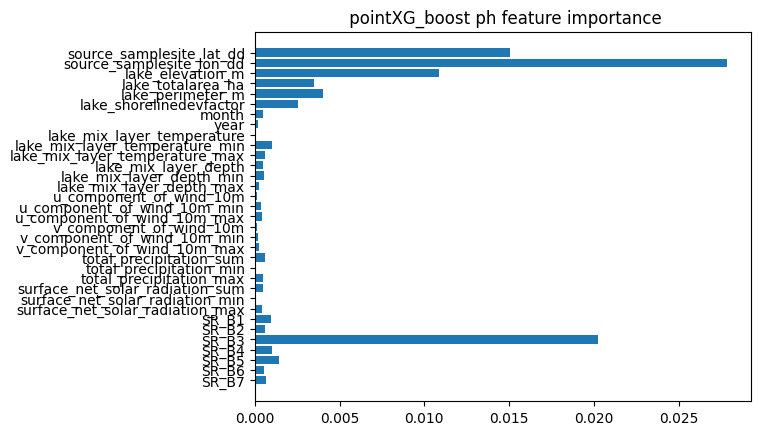

[1.18612657e-02 3.50992561e-02 1.23327834e-02 2.34168224e-03
 0.00000000e+00 0.00000000e+00 6.80494495e-03 4.36922087e-03
 5.50209670e-04 2.52671912e-04 3.60227298e-04 8.98056790e-04
 6.36043535e-04 3.17976203e-04 8.66516504e-04 3.19736422e-04
 8.90665533e-05 4.44404677e-04 1.55409627e-04 1.69821722e-04
 4.04197984e-04 3.41088867e-04 7.50944955e-05 8.71372783e-05
 1.04951330e-04 7.33121509e-04 0.00000000e+00 6.81532352e-04
 2.87111426e-04 1.11434617e-03 1.78350817e-02 2.08622511e-03
 3.89228815e-03 2.21472679e-03 7.78340260e-04]


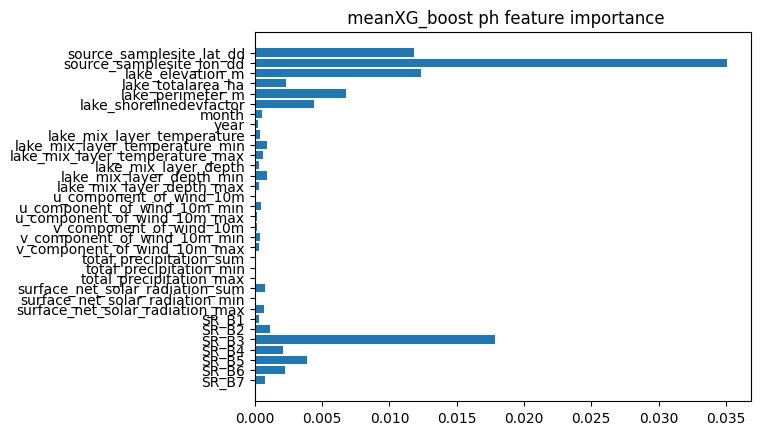

[ 1.24035619e-02  2.85290904e-02  9.11492829e-03  2.53719187e-03
  0.00000000e+00  0.00000000e+00  3.95298636e-03  2.89444191e-03
  2.25973966e-04  2.10135758e-04  4.77892657e-04  1.07971929e-03
  6.75302905e-04  1.50538877e-04  2.96656952e-04  2.33092571e-04
  2.76134441e-04  6.22577974e-04 -2.00443708e-05  2.05050820e-06
  1.63940386e-04  1.51350043e-04  1.21582543e-04  4.25158948e-06
  1.30238766e-04  8.07961727e-04  0.00000000e+00  5.27338807e-04
  5.06002354e-04  2.51808791e-04  2.66519236e-02  8.38882596e-04
  1.76738570e-03  7.74621664e-04  1.72139467e-04]


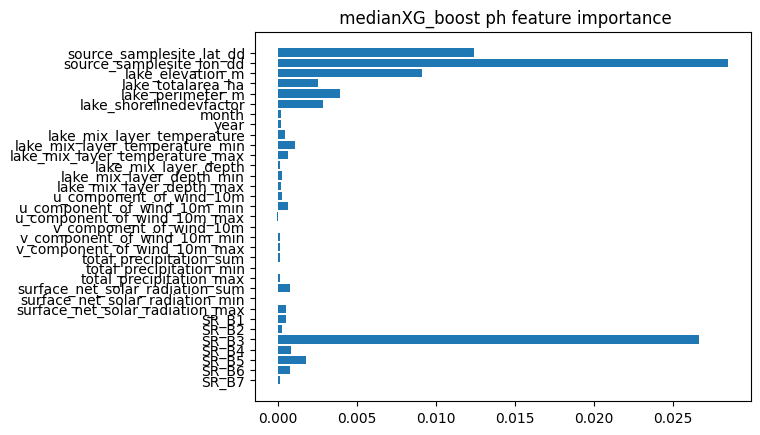

[ 3.49755410e-02  5.43203329e-02  3.33986672e-02  4.53645222e-03
  0.00000000e+00  0.00000000e+00  4.54227956e-03  4.51611683e-03
  1.11059664e-03  9.08383433e-04  6.23976568e-04  3.00739091e-04
  4.69338995e-05  1.11073720e-03  1.18221592e-03  1.04930476e-03
 -2.81662279e-04 -3.23039279e-04  2.88070920e-04 -2.25015542e-04
  1.53824769e-05  5.57397225e-04  1.30512814e-04 -6.28845734e-06
  8.96620647e-05  1.77803576e-04  0.00000000e+00  3.18183103e-04
  2.67644208e-03  2.15939603e-02  7.59615157e-03  1.26761202e-01
  5.77913485e-03  1.02887639e-02  7.06322952e-03]


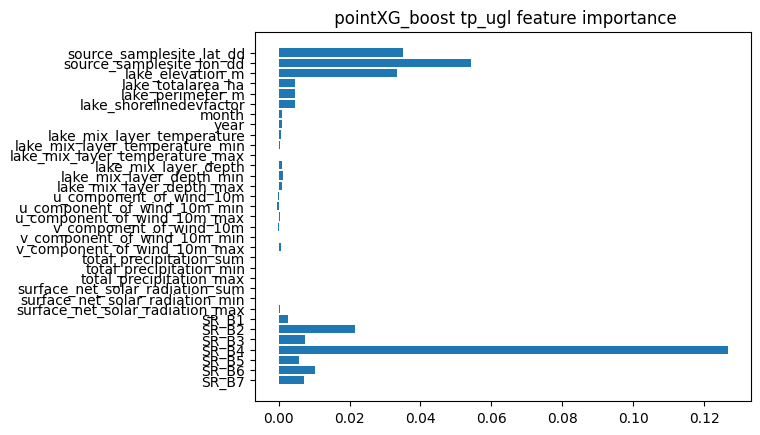

[ 4.38961038e-02  4.97580641e-02  2.58820212e-02  6.35187385e-03
  0.00000000e+00  0.00000000e+00  5.80703944e-03  4.58414681e-03
  1.12544946e-03  1.27089776e-03  6.26006054e-04  3.97433903e-04
  5.47073519e-04  1.07836132e-03  1.13235998e-03  2.29137093e-03
 -3.64799794e-05  1.77603468e-04  8.16683743e-06  5.93609228e-04
 -5.86636659e-04  6.10449433e-04  3.29960957e-04 -2.10739913e-05
  3.40676614e-04  7.37222651e-04  0.00000000e+00  6.27598037e-04
  4.12348397e-03  3.48812920e-02  7.24398044e-03  1.23655925e-01
  6.09826586e-03  9.30785106e-03  9.44801532e-03]


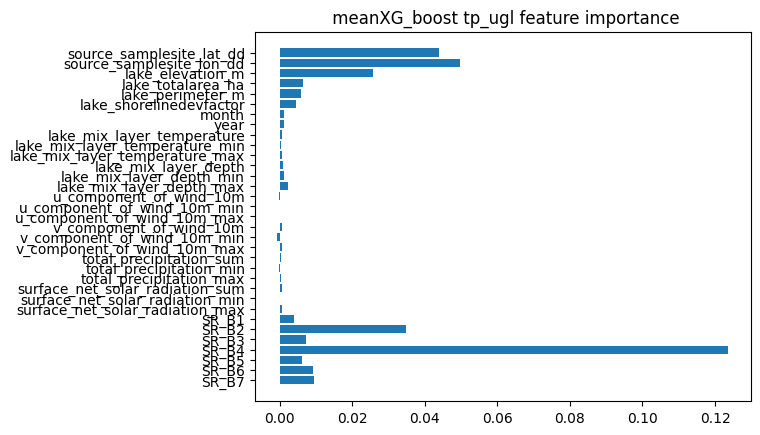

[ 3.62469828e-02  4.59106550e-02  3.16783416e-02  5.11841947e-03
  0.00000000e+00  0.00000000e+00  3.63376010e-03  4.50049259e-03
  1.22708490e-03  1.40657129e-03  7.77572254e-04  3.82055677e-04
  6.52331527e-05  1.42893854e-03  7.11166133e-04  1.80100669e-03
  1.08087528e-04  4.92458097e-04 -2.11229174e-04  1.34499062e-04
  1.10127456e-04  7.08157680e-05  1.06835930e-04 -2.17451409e-06
 -3.10265779e-05  1.91559803e-04  0.00000000e+00 -8.80299714e-05
  2.78897102e-03  2.39995827e-02  8.26696370e-03  1.23850618e-01
  6.85924743e-03  6.89752706e-03  6.96956434e-03]


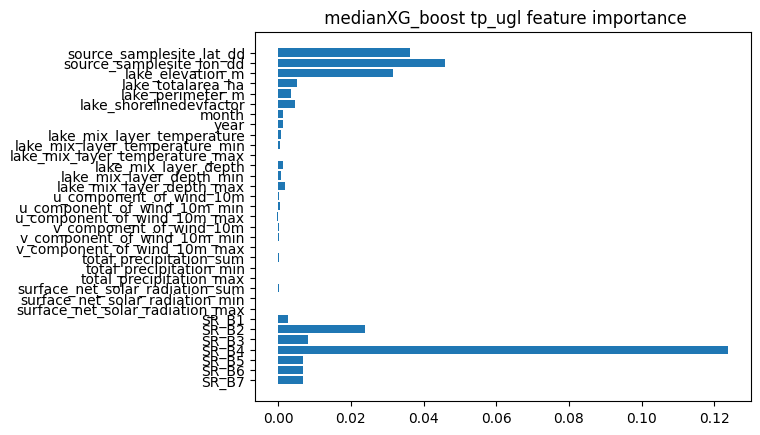

[ 5.65222823e-02  1.55750179e-01  1.45085567e-02  1.34108658e-02
  0.00000000e+00  0.00000000e+00  8.19392345e-03  8.47029959e-03
  8.83700255e-03  1.29566590e-02  3.88249574e-04  2.12242198e-03
  3.58106170e-03 -1.32126328e-03  4.36132575e-03  4.76620856e-02
  1.32493011e-03 -1.14809140e-03  5.54209523e-03  1.14677995e-03
  4.48747081e-03 -2.11178324e-03 -5.63712043e-04  9.87535814e-05
 -8.23083568e-04 -9.45042618e-04  0.00000000e+00  1.13337325e-03
  1.59494858e-03  1.47264661e-03  6.22394606e-03  2.20529110e-02
  4.85302385e-04  3.32826092e-03  7.45514045e-03]


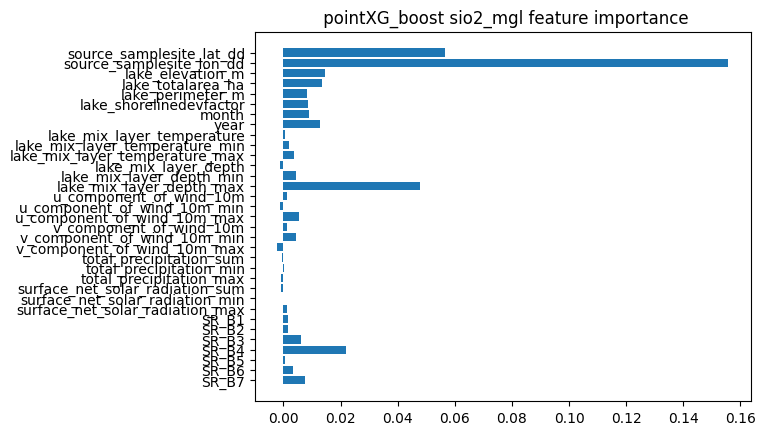

[ 6.60374446e-02  1.96282110e-01  2.51048301e-02  1.53736246e-02
  0.00000000e+00  0.00000000e+00  1.27631236e-03  1.88056652e-03
  6.64495125e-03  2.45044768e-02  6.84276584e-04 -5.16616109e-04
  3.36159116e-03  1.72483191e-03  3.11961512e-03  8.63992318e-02
  2.53614350e-03 -2.86904349e-04  3.14143248e-03  1.44572121e-03
  2.75995005e-03  1.18173165e-03 -7.14662852e-06 -4.82377304e-04
 -2.84970220e-03 -1.60544192e-03  0.00000000e+00  3.44935055e-03
  9.96039946e-04 -1.05721892e-03  2.62949659e-03  4.29118900e-02
  3.63809166e-03  3.88710478e-03  2.20885600e-03]


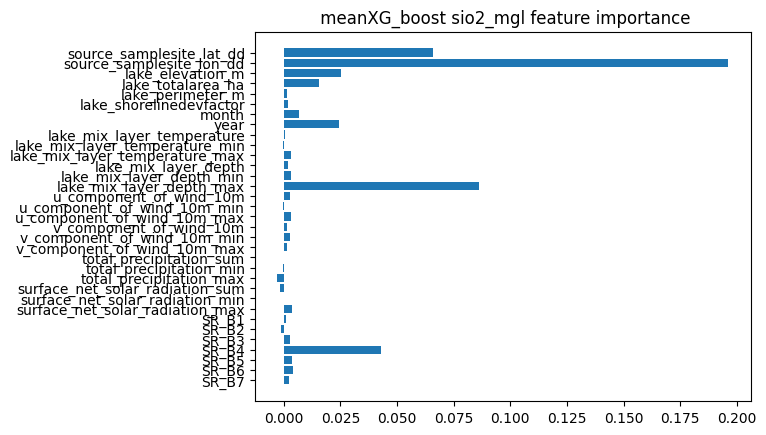

[ 7.24174721e-02  1.93720706e-01  1.21479860e-02  1.02868253e-02
  0.00000000e+00  0.00000000e+00  6.27104692e-03  3.58903136e-03
  9.68204243e-04  2.06383139e-02 -7.24841369e-05  2.11985224e-03
  1.78194811e-03 -9.47124650e-04  3.51712870e-03  6.30827730e-02
  2.36503553e-04 -3.00876131e-04  2.12655194e-03  1.75768279e-03
  2.44007624e-03 -5.48650661e-04 -8.10935769e-04 -1.50662994e-04
 -2.73360556e-03 -4.03111626e-03  0.00000000e+00 -2.36327648e-03
  1.08161040e-03  9.10135577e-04  6.45523125e-03  2.74972948e-02
  7.06772889e-04  1.09786000e-03  1.48182076e-03]


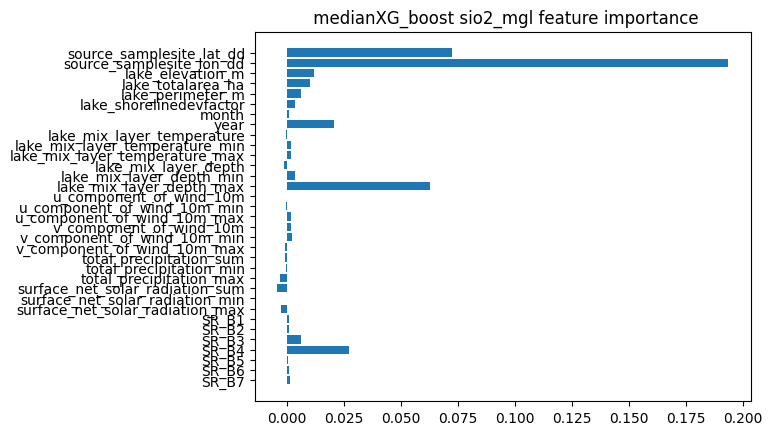

[ 2.33666463e-01  1.63191449e-02  7.19001984e-01  2.23894167e-02
  0.00000000e+00  0.00000000e+00  5.15937011e-03  8.11430086e-03
  1.25178304e-03  1.26151261e-02  1.49116655e-04  3.23165520e-03
  6.47524398e-03  0.00000000e+00  1.35256618e-02  2.50434423e-03
 -1.13030364e-03  2.32506761e-02 -2.12430416e-03  4.15789653e-02
  1.58298851e-03  3.45022806e-03 -1.52312012e-03  0.00000000e+00
 -1.38826285e-03  1.05690350e-02  0.00000000e+00 -2.78253017e-04
 -1.31704805e-03 -4.49571773e-03  6.59954214e-04  7.34916493e-03
  3.12805309e-02 -4.63172138e-04 -5.70252924e-03]


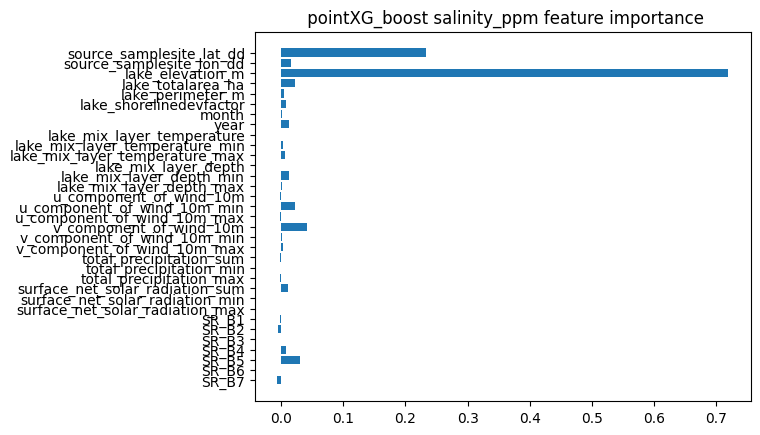

[ 3.04931095e-01  2.68459155e-02  9.67141975e-01  1.70910820e-02
  0.00000000e+00  0.00000000e+00  5.11714748e-03  1.17445769e-02
  1.86564746e-03  6.87067985e-03  5.06820883e-04  6.17048486e-03
  2.05568473e-03  4.92239940e-03  4.67042690e-03  5.57767977e-03
 -5.15620629e-04  1.70851699e-02 -1.97459052e-03 -4.59296140e-03
  1.22790720e-02  3.47242133e-03 -1.26102410e-03  0.00000000e+00
 -8.79801549e-03  1.13598420e-03  0.00000000e+00  3.32820992e-03
  2.93354388e-02 -1.77650229e-03  1.21733869e-01  1.48455843e-02
  1.89605186e-02 -7.33463936e-03  1.43180171e-03]


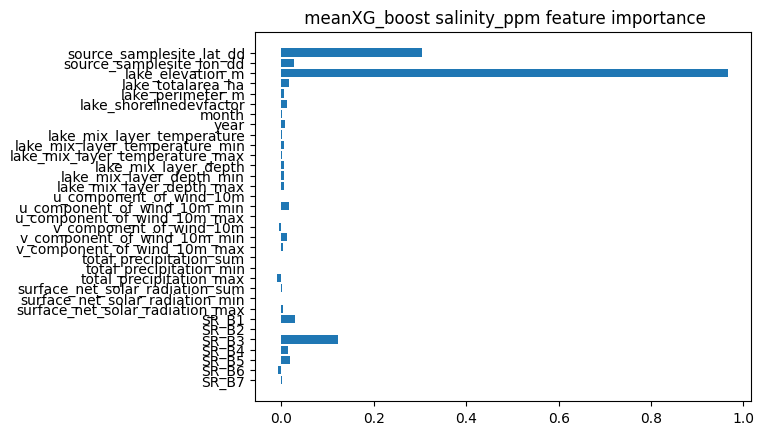

[ 3.02128096e-01  5.58898755e-02  1.08363573e+00  4.66931380e-02
  0.00000000e+00  0.00000000e+00  8.87460786e-03  9.03183454e-05
 -1.14709920e-03  1.39639289e-03 -8.59042292e-04  1.69103296e-03
 -1.31700718e-04  1.22675931e-03 -5.72553564e-05  1.50171213e-03
 -2.21159183e-03 -1.26948920e-03  9.52223545e-04 -1.31437495e-04
  4.13976678e-03  5.02729967e-03 -4.64961147e-03  0.00000000e+00
 -3.56244529e-03 -2.27162299e-03  0.00000000e+00 -1.53009977e-02
  4.79757512e-02 -1.13462831e-04  8.90741828e-02  3.22242950e-02
  4.09661018e-03 -2.18912060e-03 -7.85105184e-04]


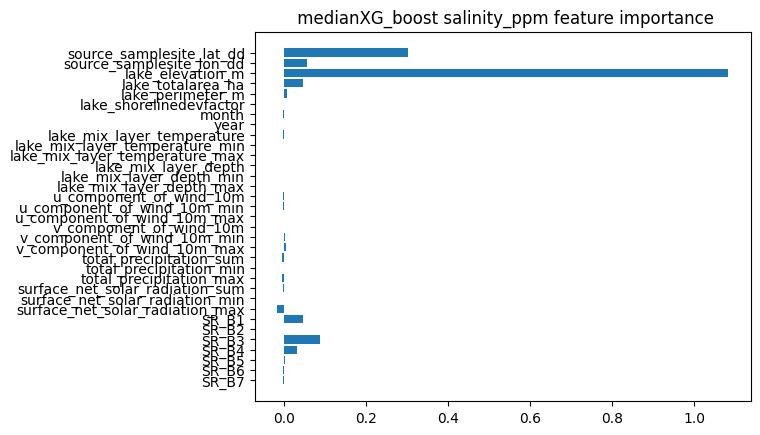

In [9]:
reduction_methods = [' point', ' mean', ' median']
for key in num_to_param.keys():
    for reduction_method in reduction_methods:
        permute_importance(dataset,reduction_method,key, models_2[reduction_method]['train'][key]['XG_block']['model'],"XG_boost")

[1.66508675e-02 1.62865626e-02 2.47034703e-03 1.71129207e-04
 2.47034701e-03 1.71129206e-04 1.00221770e-03 1.56112601e-04
 1.56046952e-05 1.30657481e-04 4.25682836e-03 1.92350250e-02
 7.85251290e-03 6.04694483e-03 1.36480835e-02 5.07005139e-03
 4.34683841e-04 4.01184176e-05 1.69752032e-04 1.24796238e-04
 1.56497860e-04 8.62639672e-04 1.13453998e-04 1.54098218e-06
 5.48077517e-05 7.04643550e-05 0.00000000e+00 9.59777170e-04
 1.25206359e-01 4.09091041e-01 4.83280998e-02 3.13219987e-01
 1.21381586e-03 3.48299802e-02 1.66851819e-01]


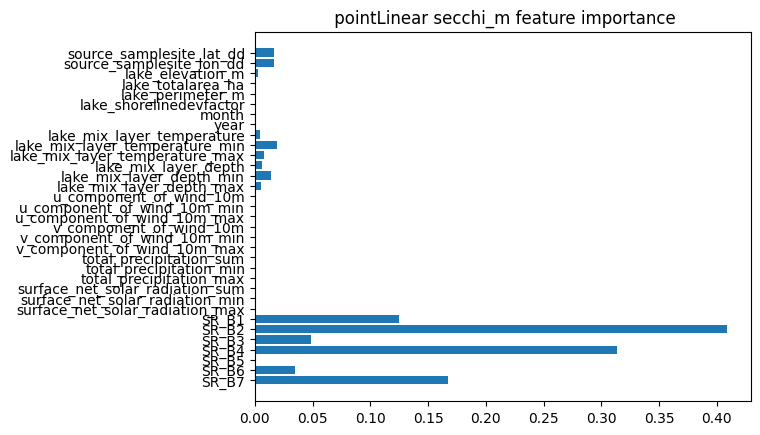

[ 1.82923398e-02  1.70542007e-02  2.35653192e-03  1.88915925e-03
  2.35653193e-03  1.88915924e-03  8.31909099e-03  1.54417710e-03
  3.88726572e-06  2.07007138e-04  5.58353388e-03  1.89352676e-02
  7.61651193e-03  7.03118419e-03  1.30815545e-02  3.63345581e-03
  3.01199997e-04  9.05063009e-05  1.72517757e-04  2.52069880e-04
  4.91191799e-05  1.11558123e-03  1.51575071e-04 -1.29367146e-06
  5.17234865e-05  1.92821387e-04  0.00000000e+00  1.20053805e-03
  7.85033204e-02  2.98938227e-01  4.48610471e-02  2.57696382e-01
  1.41162255e-03  2.63439355e-02  9.22233910e-02]


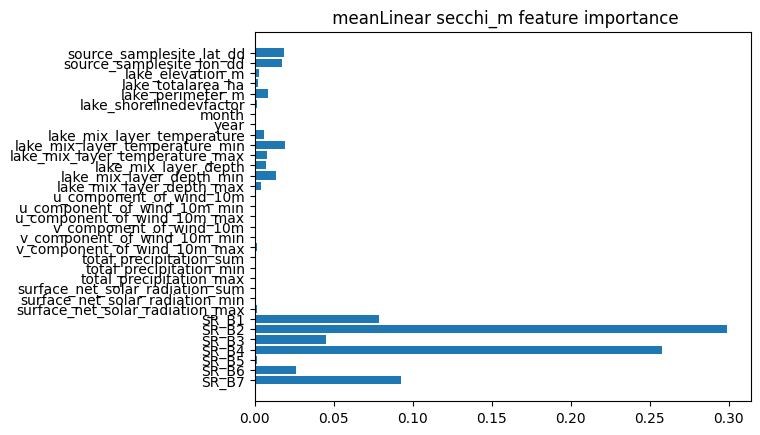

[ 1.75939521e-02  1.76594087e-02  2.67677929e-03  2.55564000e-03
  2.67677914e-03  2.55564000e-03  1.79286951e-02  3.53354012e-03
  3.21860822e-05  1.24390443e-04  5.56783303e-04  9.91402698e-03
  9.85771155e-03  6.33739811e-03  1.20154207e-02  3.85302865e-03
  4.04279426e-04  4.58571002e-05  1.99098639e-04  2.28529052e-04
  8.05133779e-05  1.14381028e-03  1.02356931e-04 -6.11176222e-06
  8.03447548e-05  8.72333198e-05  0.00000000e+00  9.06397767e-04
  5.18996346e-02  2.21536303e-01  3.46284938e-02  2.35779710e-01
  2.29011185e-04  8.60645267e-03  4.84802554e-03]


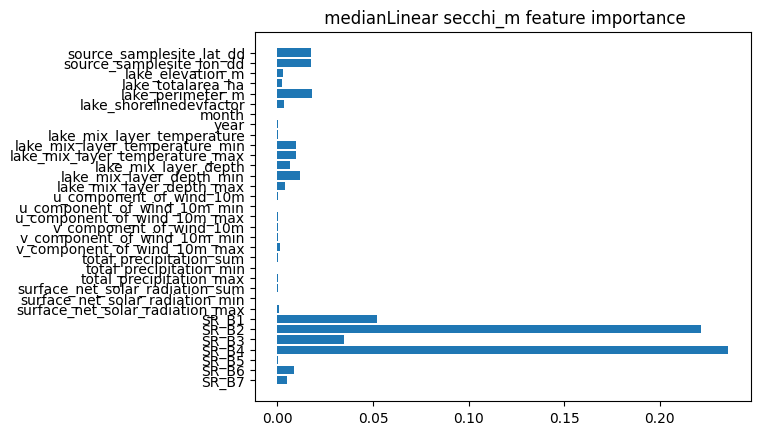

[ 2.71377633e-03  1.09574310e-03  2.97092421e-03  1.09674854e-04
  2.97092434e-03  1.09674756e-04  8.20605025e-03  2.45743532e-04
  4.42682833e-03  1.34413158e-04  1.75674554e-03  2.24452775e-03
  3.27607579e-03  1.09133011e-02  1.40983223e-03  2.34311427e-02
  3.01105094e-03  7.73816113e-04  3.02630194e-04  1.22542555e-05
  4.38172504e-04  7.99062331e-04  3.08412389e-03 -4.05911912e-05
  1.20383757e-03  2.06518845e-03  0.00000000e+00  2.81957550e-04
  1.94835474e-01  7.18294693e-01  1.97291961e-01  3.57252059e-01
  3.81997833e-05  7.14220052e-03  4.41247811e-02]


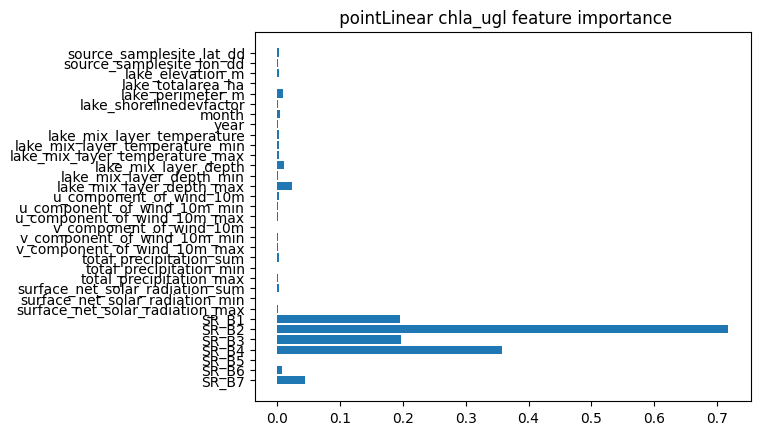

[ 1.14766572e-03  2.41667049e-03  2.27693143e-03  2.09469015e-04
  2.27693150e-03  2.09469276e-04  8.84309821e-03  2.64285737e-04
  3.96724022e-03  3.21299708e-05  2.01953486e-02  1.08889390e-03
  2.37509653e-02  1.80173413e-03  4.33209679e-03  1.05463720e-02
  1.73063300e-03  5.18380917e-04  1.11447774e-04 -7.42303258e-06
  9.18749081e-04  5.00897211e-04  2.26378592e-03 -5.88649703e-05
  6.75569472e-04  2.04237921e-03  0.00000000e+00  3.40743849e-04
  1.21399351e-01  5.74116064e-01  1.79477558e-01  2.86908253e-01
  4.99214988e-03  8.03331138e-04  4.76616537e-02]


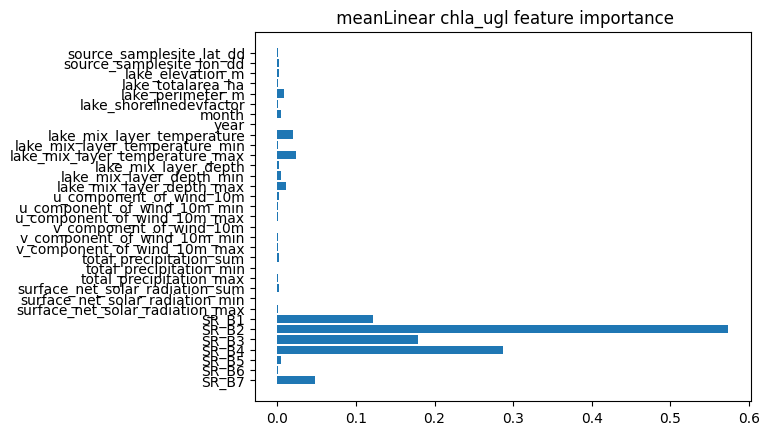

[ 1.32432333e-03  2.07381921e-03  2.59889747e-03 -1.07915502e-05
  2.59889734e-03 -1.07915288e-05  5.78279208e-03  7.11116603e-05
  4.75901800e-03  5.40892010e-05  3.75720092e-02  8.04517975e-03
  2.30906589e-02  2.50767675e-03  3.39880199e-03  1.01831631e-02
  1.18734834e-03  4.91843681e-04  4.29212850e-05 -2.02472817e-05
  7.74164663e-04  4.86404084e-04  2.06989795e-03 -3.92685888e-05
  5.20328380e-04  1.88626105e-03  0.00000000e+00  2.94218962e-04
  7.79082557e-02  4.59193747e-01  1.66750656e-01  2.26917385e-01
  1.70563423e-03  2.02788580e-02  6.08218501e-05]


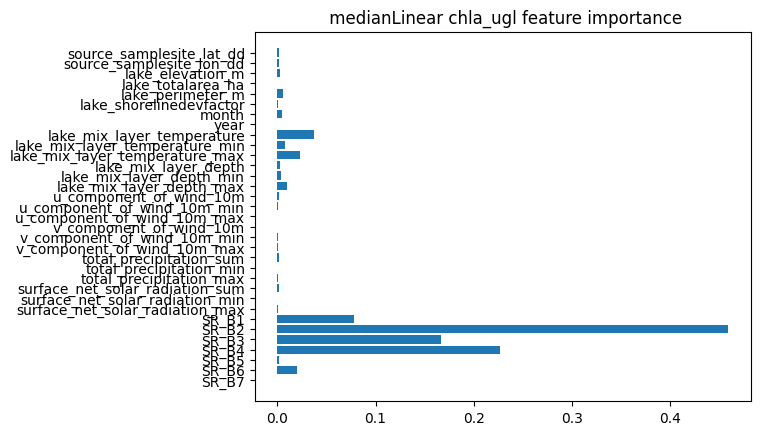

[ 4.05943180e-03  1.12242145e-02  6.55830272e-03  1.36310618e-02
  6.55830326e-03  1.36310604e-02  1.46090591e-01  4.25317192e-02
  1.35894908e-03 -9.81161655e-05  1.80797223e-01  1.09986235e-03
  1.88087117e-01  2.46954623e-02  1.31696517e-03  2.02557486e-02
  9.57724297e-04  4.69764180e-04  3.55204059e-03  5.36513494e-03
  5.35735346e-03  3.41941994e-04  3.25316581e-03 -1.55374956e-05
  1.57770835e-03 -4.57419402e-05  0.00000000e+00  2.13303472e-03
  1.99246339e-03  7.10716668e-02  1.76158105e-02  3.55301667e-02
  1.01216150e-02  2.52133221e-02  2.72707806e-03]


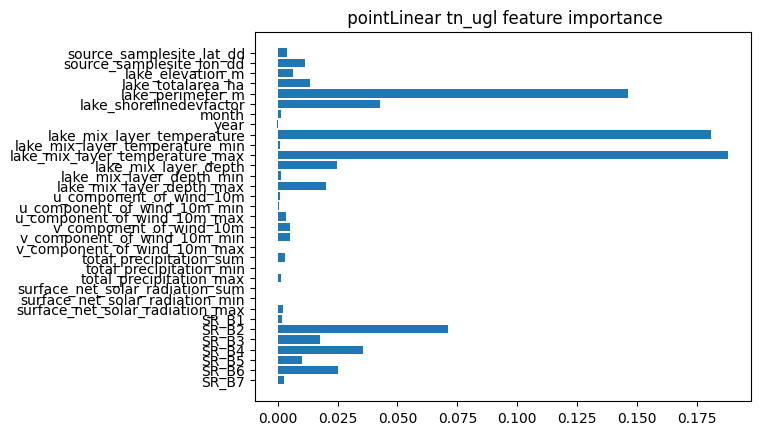

[ 4.40918620e-03  1.34126063e-02  6.66109234e-03  5.55414549e-03
  6.66109172e-03  5.55414738e-03  9.55830318e-02  2.64862110e-02
  1.62785255e-03 -9.73109386e-05  1.02229310e-02  8.50540503e-02
  1.47181795e-01  5.68770238e-02  8.90369007e-04  4.53121000e-02
  7.91610874e-04  3.20646351e-04  4.48654340e-03  5.59108104e-03
  6.35816667e-03  6.51360650e-04  3.35166061e-03 -1.18189497e-05
  2.14909867e-03 -3.83340055e-05  0.00000000e+00  2.11140496e-03
  5.67537537e-04  6.76746921e-02  2.02120882e-02  3.18460229e-02
  2.73790478e-03 -2.14768246e-04  6.62925269e-03]


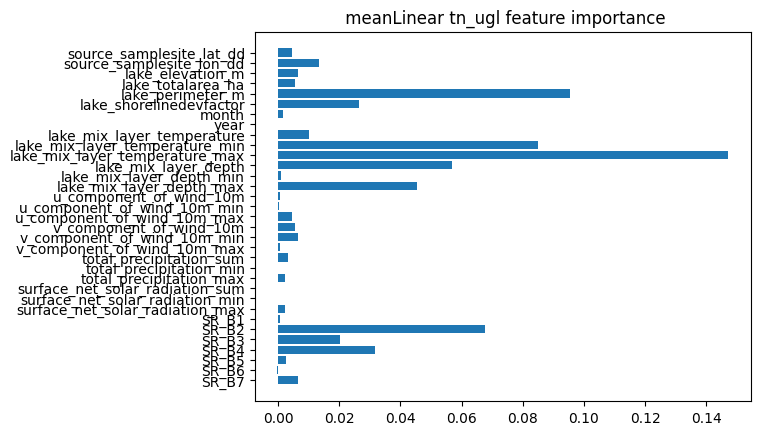

[ 4.52695076e-03  1.30353944e-02  7.24223944e-03  1.11418672e-02
  7.24224139e-03  1.11418722e-02  1.35225460e-01  3.83165029e-02
  1.34267183e-03 -1.03609227e-04  2.65299068e-02  7.11377502e-02
  1.57026680e-01  4.76040115e-02  2.30362097e-03  4.02412292e-02
  5.51496869e-04  2.05652653e-04  4.50355092e-03  4.85205332e-03
  5.81481664e-03  4.70674956e-04  3.11671062e-03 -1.83659923e-06
  2.12173560e-03 -3.29286961e-06  0.00000000e+00  2.41372271e-03
  1.27373740e-03  7.20310013e-02  2.85239410e-02  1.98642346e-02
  1.14644274e-03  3.00576762e-03  2.59111416e-03]


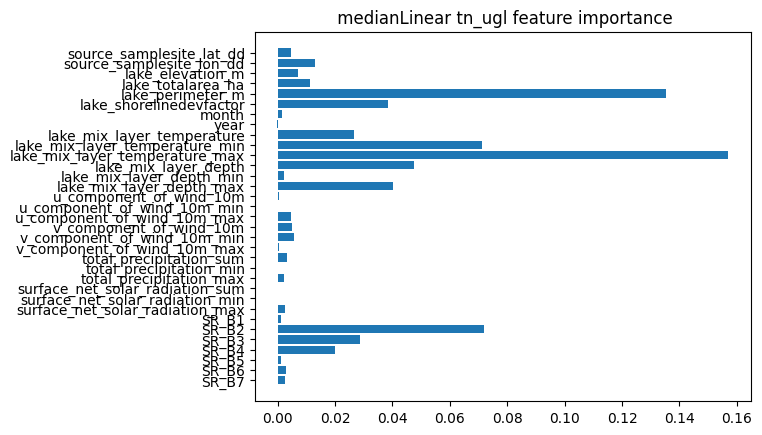

[ 1.38380770e-02  1.44301055e-04  1.55377155e-03  1.57642274e-02
  1.55376890e-03  1.57642349e-02  1.01814750e-01  2.60964824e-02
  6.59724262e-03  8.86009433e-05  1.95877169e-03  4.63963516e-02
  3.38539830e-05  7.74170800e-04  9.31387042e-05  1.61873469e-03
  4.97028339e-04  7.24764579e-04 -1.96476364e-05  1.95219606e-05
  7.63384544e-06  1.50155283e-04  4.59137322e-04  8.32797992e-06
  4.42823856e-06  1.78241522e-03  0.00000000e+00  3.12007918e-03
  5.67517433e-04  9.96822568e-03  3.13654019e-02  3.40267642e-04
  1.07775768e-04  2.18021454e-04  1.79261457e-05]


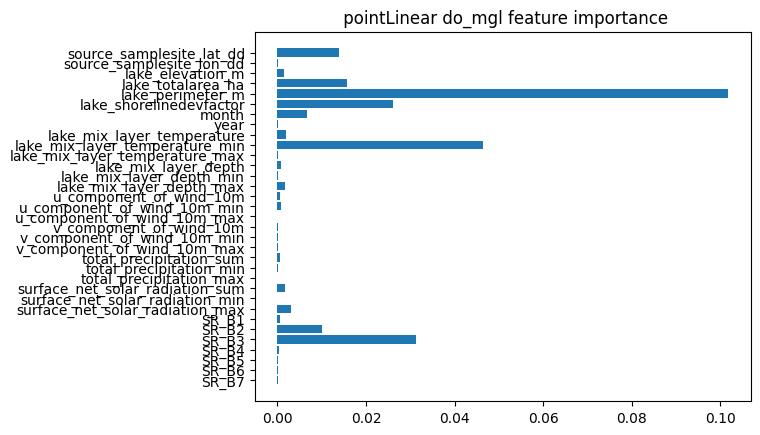

[ 1.32059392e-02  5.60980581e-05  1.46559888e-03  8.95029856e-03
  1.46559963e-03  8.95029272e-03  7.80110784e-02  2.41368629e-02
  6.69900890e-03  9.59107734e-05  1.44703770e-03  4.78496817e-02
  2.69843483e-04  2.14204660e-04  2.03142889e-05  1.07350557e-03
  4.44175386e-04  5.95244909e-04 -5.00406542e-05 -1.22126235e-05
 -7.77768778e-06  1.95074158e-04  4.19422787e-04  3.08708634e-05
  1.37708840e-05  2.09355188e-03  0.00000000e+00  3.36248579e-03
  2.81909781e-04  1.08247901e-02  2.41626171e-02  5.64732146e-04
  3.57801979e-04  3.05739663e-03  4.54146268e-04]


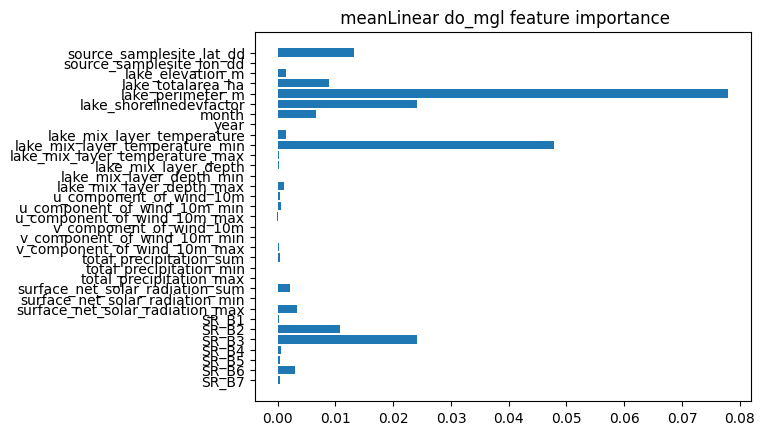

[ 1.29795899e-02  1.08739827e-04  1.45253459e-03  1.34905759e-02
  1.45253580e-03  1.34905723e-02  9.39633770e-02  2.47681824e-02
  6.64621737e-03  1.03451864e-04 -2.53944235e-05  4.13382060e-02
  1.04686812e-03  1.82391532e-04  1.11314781e-05  1.02039210e-03
  5.78513221e-04  8.00524317e-04 -3.93993486e-05  1.60389970e-05
 -3.64321778e-08  1.51666267e-04  4.41225665e-04  2.22997354e-05
  5.46136918e-06  2.05647456e-03  0.00000000e+00  3.34865761e-03
 -1.19097931e-05  6.63231134e-03  2.22534425e-02  1.03002241e-03
  1.12787409e-04  7.76568331e-03  3.85804081e-03]


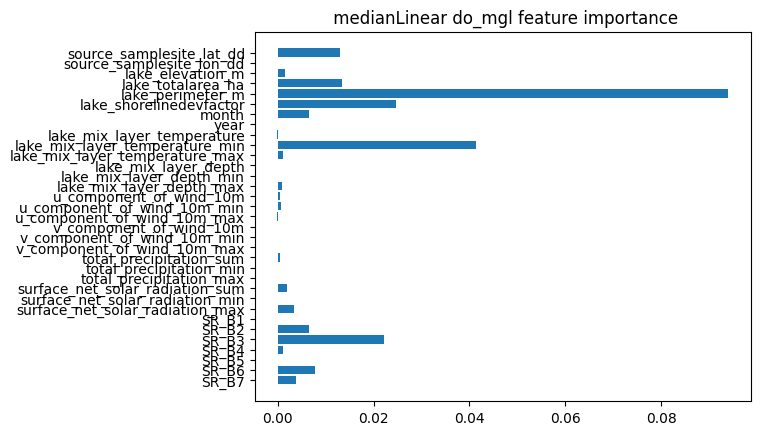

[ 1.78278028e-02  7.53101247e-03  1.07862773e-04  2.50496548e-03
  1.07862762e-04  2.50496554e-03  1.37530928e-03  4.47415934e-04
  1.57229304e-04  2.66912381e-05  6.21805833e-02  9.97066681e-02
  1.12298410e-02  3.95179067e-03  2.06899359e-03  3.39431678e-03
  2.45871434e-04  1.49173579e-04  2.23248839e-04  6.08475266e-04
  1.50848397e-03  3.35237924e-05 -2.92935711e-06 -2.03820812e-05
  3.67160842e-06  2.13108802e-04  0.00000000e+00  4.96039430e-04
  1.61612619e-03  2.67507949e-02  4.64250381e-02  1.44701679e-03
  1.39995839e-05  2.67500577e-02  1.67079135e-02]


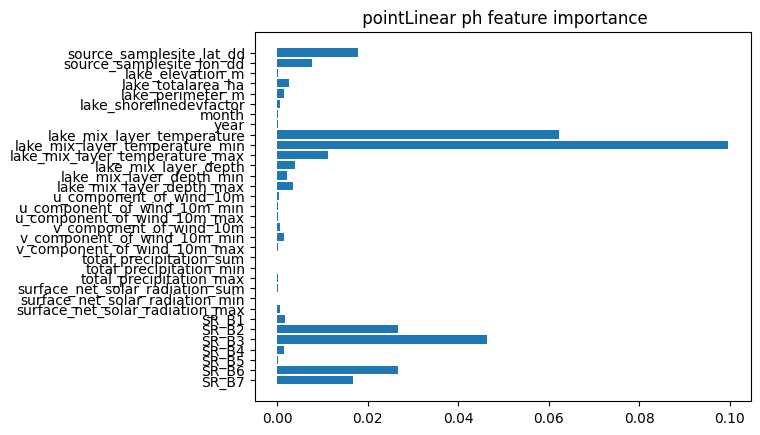

[ 1.96422380e-02  7.09711833e-03  1.25510025e-04  1.60869085e-03
  1.25509966e-04  1.60869072e-03  1.48349655e-03  4.12742148e-05
  1.75802284e-04  7.25376765e-06  6.87051484e-02  1.06114264e-01
  1.03976402e-02  6.20196487e-03  1.55445322e-03  5.03169940e-03
  1.53451529e-04  1.18061522e-04  1.60774354e-04  6.56208273e-04
  1.39726498e-03  6.13130034e-06 -7.54607188e-06 -2.29860318e-05
  3.54844430e-06  2.44345196e-04  0.00000000e+00  5.15478379e-04
  3.40853656e-03  3.04477589e-02  4.65350524e-02  3.33438117e-04
  1.17592187e-03  4.03512582e-03  2.67516218e-03]


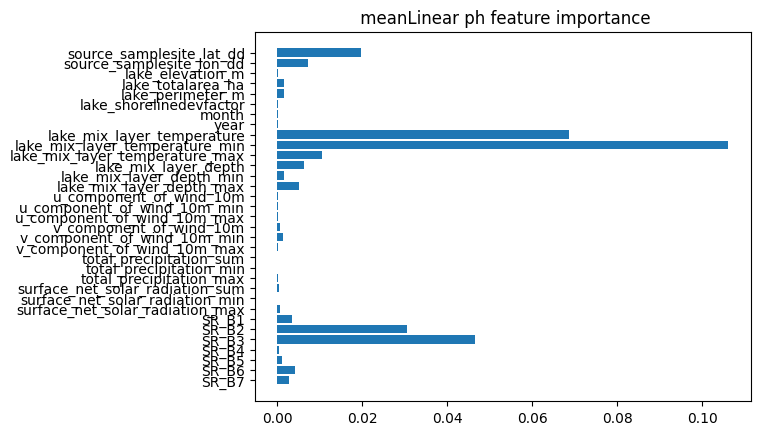

[ 1.78629705e-02  7.59717944e-03  9.39844592e-05  1.90289240e-03
  9.39844753e-05  1.90289270e-03  7.25454180e-04  3.75186948e-04
  1.72519786e-04  6.79552098e-06  7.65541427e-02  1.07606661e-01
  8.20770038e-03  5.76879056e-03  1.45925488e-03  4.61227993e-03
  1.41917652e-04  1.63272889e-04  1.99486244e-04  6.08109980e-04
  1.49595614e-03  1.91127386e-05 -3.83056176e-06 -2.03904207e-05
  2.22529873e-06  1.46510212e-04  0.00000000e+00  4.17032079e-04
  8.66370106e-04  1.80731079e-02  4.28584563e-02  7.28063518e-04
  1.53397822e-04  8.41849482e-03  7.18263069e-03]


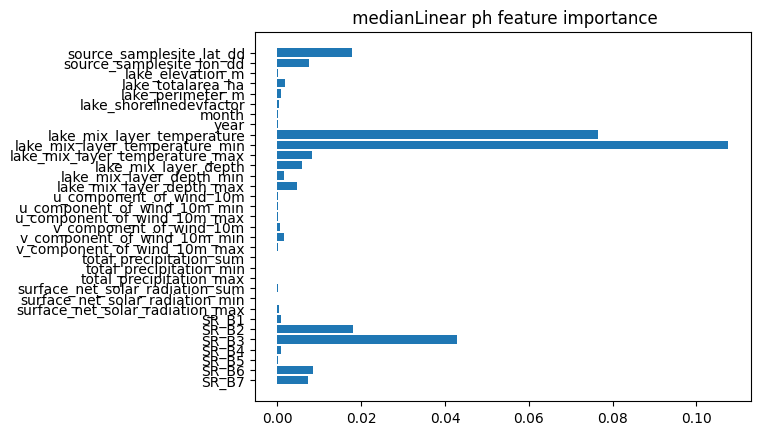

[ 3.64077658e-04  1.45222711e-02  1.09785964e-02  1.70063234e-03
  1.09785974e-02  1.70063235e-03  2.41144540e-02  7.66760257e-03
  4.87756570e-04 -1.93992344e-05  3.37233837e-04  1.48053371e-03
  1.29822199e-02  2.21258671e-05  7.30537254e-04  1.51706804e-04
  6.75217084e-04  1.63417151e-03 -1.90954668e-05 -3.01674483e-05
  2.02988361e-03  2.28803390e-04 -1.67788019e-05  8.93955364e-06
  1.87585034e-04  5.23897666e-04  0.00000000e+00  5.26924871e-04
  3.09423900e-02  1.73407420e-01  2.58332688e-02  1.93360526e-01
 -4.61678838e-04  2.11339080e-02  1.00032170e-01]


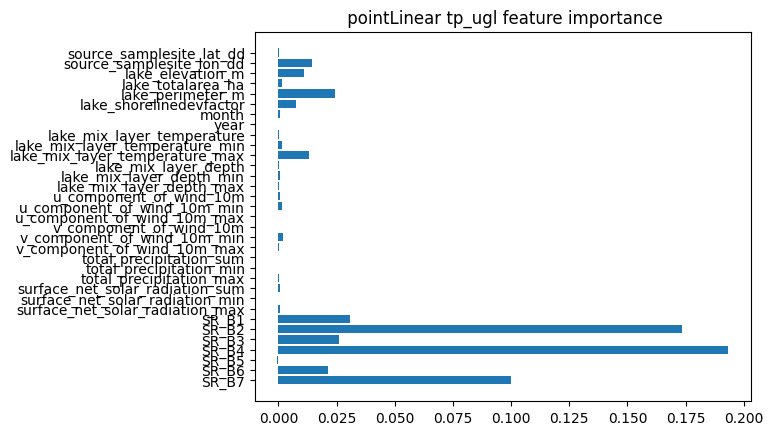

[ 9.53105862e-05  1.70063282e-02  1.05834479e-02  8.50001705e-05
  1.05834466e-02  8.50003476e-05  9.96205467e-04  1.06015925e-03
  4.71811927e-04 -2.31754557e-05  7.41051701e-05 -1.15933776e-04
  6.23590589e-03  1.71257866e-05  7.04958818e-05 -7.06153971e-06
  6.79906792e-04  1.58357082e-03 -3.08135237e-05 -3.40496986e-05
  2.12141775e-03  3.46200579e-04 -6.82936714e-06  7.86712695e-07
  8.66412976e-05  6.84785430e-04  0.00000000e+00  8.49082438e-04
  1.73630924e-02  1.29184080e-01  1.53595365e-02  1.32799989e-01
  1.28763569e-03  1.67285117e-03  2.59754092e-02]


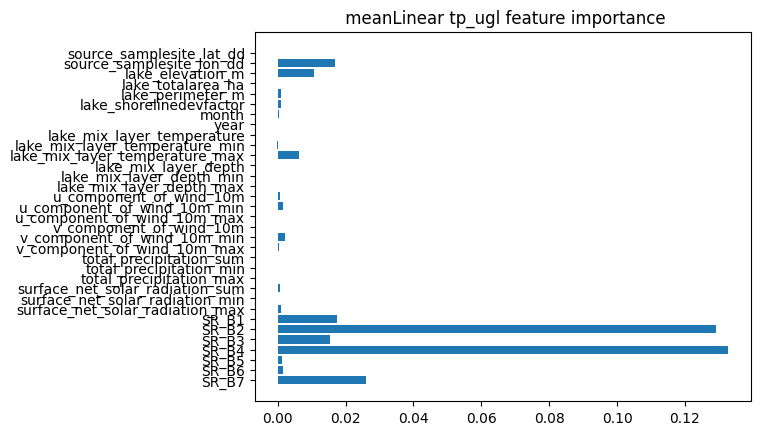

[ 5.26871566e-06  1.80628693e-02  1.06219788e-02  7.50565802e-05
  1.06219762e-02  7.50564350e-05  2.58449399e-03  9.60517092e-04
  5.25296773e-04 -2.19839885e-05 -8.20674043e-05  7.95626670e-04
  6.74099780e-03  3.14216067e-05  1.58816574e-04 -5.72327562e-06
  8.98775611e-04  1.87022751e-03 -8.53536494e-06 -4.49849471e-05
  1.96125338e-03  2.34979993e-04 -1.00629062e-06  8.15758673e-06
  7.11647846e-05  7.11587825e-04  0.00000000e+00  7.77859266e-04
  1.04642328e-02  9.74294908e-02  1.26549729e-02  1.06478755e-01
  5.82475616e-04  1.00897730e-02  7.08912086e-06]


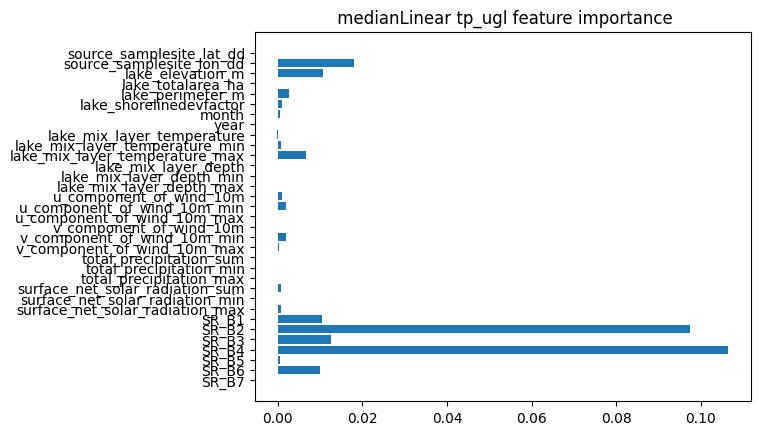

[ 1.79668434e-03  1.33674468e-01  9.05456353e-04  4.27494039e-01
  9.05370752e-04  4.27493838e-01  1.86111496e+00  7.11359096e-01
  1.82720435e-02  1.99688821e-04  1.74842668e+00  1.07569734e+00
  4.40699811e-01  8.22807579e-01  1.75133500e-01  5.71866250e-01
  3.71492081e-02  1.28545376e-02 -2.27720243e-03  1.79434054e-02
  4.68508453e-02 -5.40978667e-04  1.69022335e-03 -5.05999557e-04
  2.10560840e-03  2.01560206e-02  0.00000000e+00 -2.09821912e-03
  1.91178575e-02  5.03067355e-02  1.01706331e-02  1.17828435e-01
  2.98723516e-04 -2.92381765e-05  1.46795029e-02]


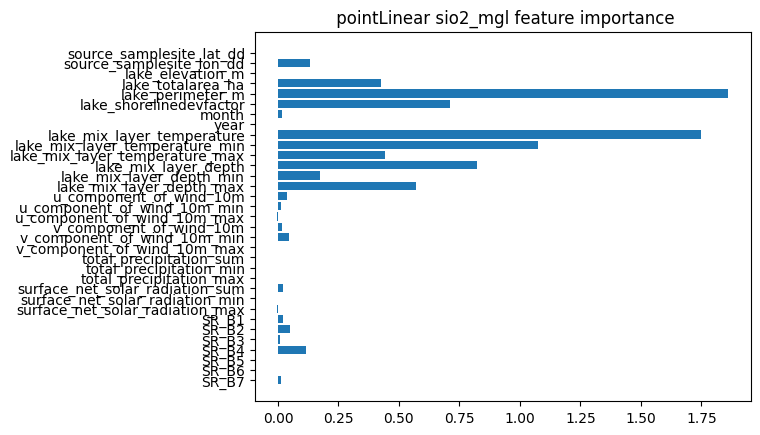

[ 1.66984783e-02  1.11936493e-01  3.16004849e-03  2.59283409e-01
  3.15994625e-03  2.59284747e-01  1.13104114e+00  3.49570504e-01
  1.63658907e-02  1.51742036e-04  1.29210577e+00  7.73439573e-01
  3.00919719e-01  7.87360194e-01  1.73394834e-01  5.45365154e-01
  3.50488950e-02  1.03103773e-02 -1.03330204e-03  3.86366501e-03
  3.36571289e-02  3.58571284e-04  1.74225457e-03 -8.91529419e-05
  2.63304495e-03  9.10375834e-03  0.00000000e+00 -1.95246448e-03
  2.60365665e-02  5.79480983e-02  2.33751394e-02  1.54955462e-01
  1.06293181e-02  8.29457179e-02  5.01636899e-02]


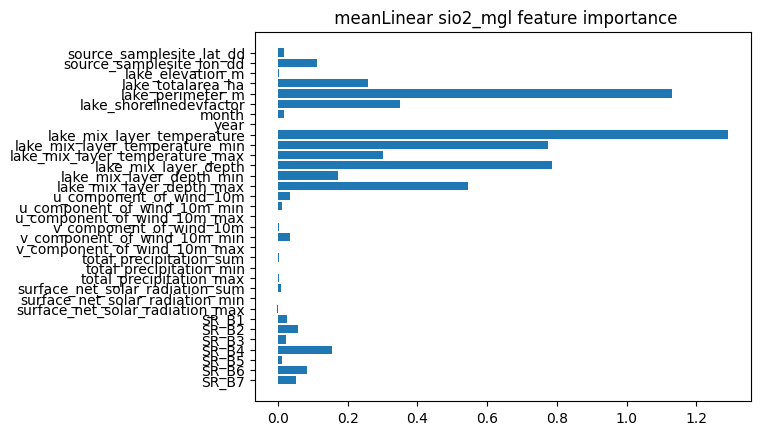

[ 6.53458228e-03  1.16047730e-01  2.05895932e-03  2.98505708e-01
  2.05885513e-03  2.98506220e-01  1.33141561e+00  4.61326151e-01
  1.80974504e-02  3.87618098e-05  1.55185537e+00  8.81080441e-01
  4.29009075e-01  8.49347508e-01  1.83142205e-01  5.84327443e-01
  3.09560670e-02  9.44195755e-03 -1.37477320e-03  1.83801098e-03
  3.00608193e-02  2.09807570e-04  3.00623084e-03  8.79496625e-05
  3.32839055e-03  1.79400714e-02  0.00000000e+00 -1.05179724e-03
  4.56638499e-03  1.03799819e-02  4.10887607e-02  1.37677249e-01
  3.24155264e-03  9.20412438e-02  1.12932955e-01]


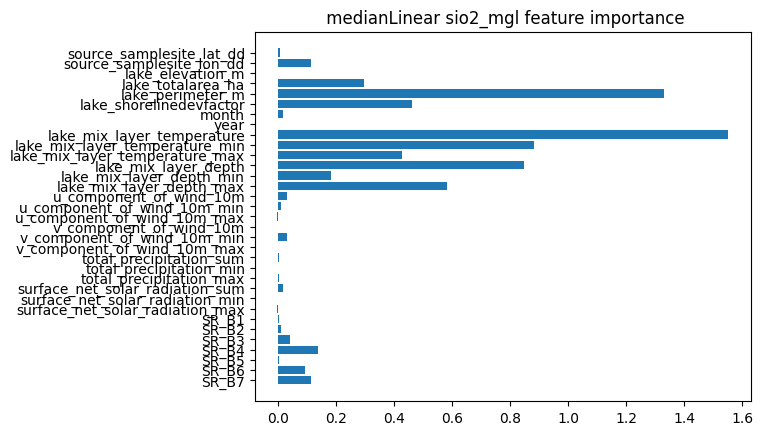

[ 3.13308470e-01  4.47978435e-03  2.91453017e-01  8.93621236e-01
  2.91452989e-01  8.93621247e-01  3.26631066e+00  9.37918845e-01
  1.84836316e-04  4.64615039e-03  4.58220748e+00  2.14994887e+00
  1.64255540e+00  8.68102640e-01  2.34830577e-03  7.82962581e-01
  4.82918910e-02  5.85141688e-02  3.27407912e-02  1.88819524e-02
  3.01524163e-03  5.61909825e-02 -3.37431049e-04 -3.86578328e-05
 -6.28485563e-04  6.77370771e-03  0.00000000e+00  1.87885813e-03
  3.02872676e-02  2.66371709e-03  9.22117851e-02  4.18624450e-02
  2.88600032e-02 -1.20281326e-03  2.53234031e-02]


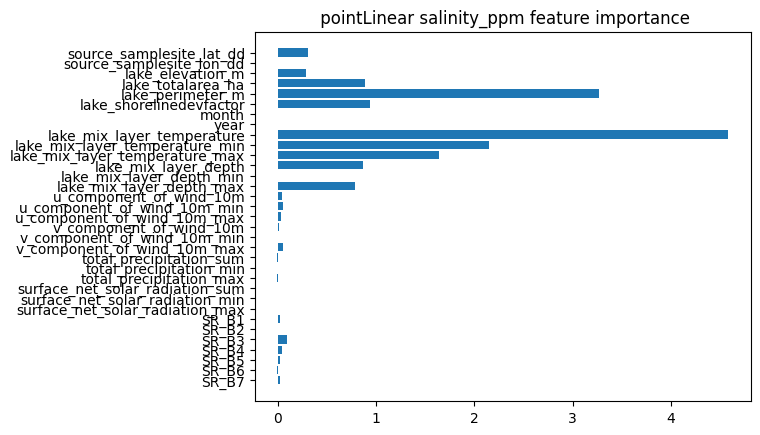

[ 3.31808628e-01 -1.81589003e-04  3.15089254e-01  8.03149499e-01
  3.15089255e-01  8.03149489e-01  3.01810613e+00  8.46491253e-01
  1.03816026e-04  1.48953661e-03  5.46932312e+00  2.74499123e+00
  1.76807804e+00  9.44280317e-01  5.05690452e-03  8.29710154e-01
  1.88051758e-02  4.24210391e-02  1.88535719e-02  3.57575233e-02
  1.86224669e-02  4.65071627e-02 -7.76109868e-04 -1.92755404e-05
 -7.79419331e-04  4.77477605e-03  0.00000000e+00  8.03257773e-04
  1.57657958e-02  1.13109562e-01  3.07516661e-02 -1.16960835e-03
  1.23426454e-01  2.96955777e-01 -1.21374150e-02]


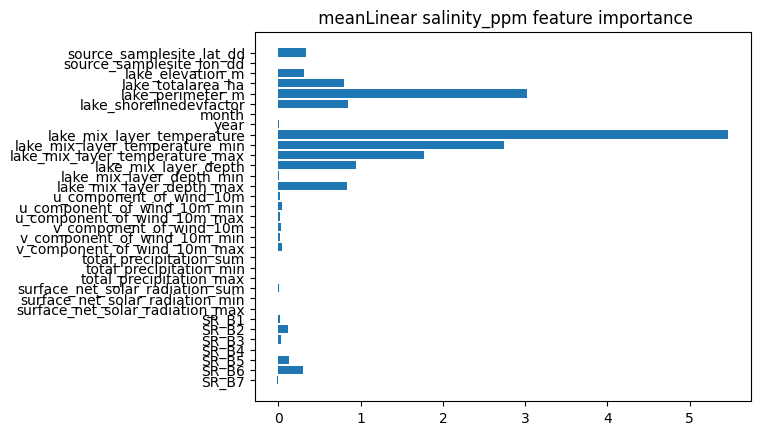

[ 3.22979923e-01  4.71960909e-04  3.13224595e-01  8.06328330e-01
  3.13224683e-01  8.06328272e-01  3.06867260e+00  8.52783575e-01
  5.87342718e-05  1.37830209e-03  5.22080738e+00  2.66854469e+00
  1.61751009e+00  8.68499882e-01  5.70144827e-03  7.51971300e-01
  1.22422795e-02  4.38841049e-02  1.57373499e-02  1.70943304e-02
  1.09075382e-02  3.46014782e-02 -1.60050334e-04 -6.94610749e-05
 -3.61285754e-04  7.64957516e-03  0.00000000e+00  9.06705887e-04
  2.95373111e-02  4.53893490e-02  3.56605325e-02  1.98536329e-02
  4.61481107e-02  1.01724137e-01  1.25660184e-02]


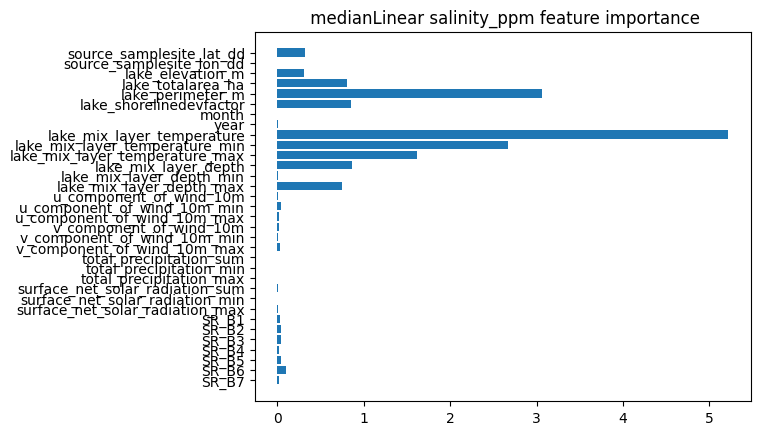

In [10]:
reduction_methods = [' point', ' mean', ' median']
for key in num_to_param.keys():
    for reduction_method in reduction_methods:
        permute_importance(dataset,reduction_method,key, models_2[reduction_method]['train'][key]['Linear_model_block']['model'],"Linear")

[ 0.0049295   0.0050977   0.00445089  0.00095361  0.00501869 -0.00016891
  0.00017482  0.00154185  0.00063995 -0.0002308   0.00147247  0.00114927
  0.00118824  0.00343362 -0.00055909  0.00092388  0.00221792  0.00171107
  0.00058599  0.00239139  0.00446828  0.00016964  0.00090197  0.00036714
  0.00068969  0.00062125  0.          0.00113619  0.00016266  0.00142156
  0.00917115  0.04464192  0.00106686  0.00197013  0.00422158]


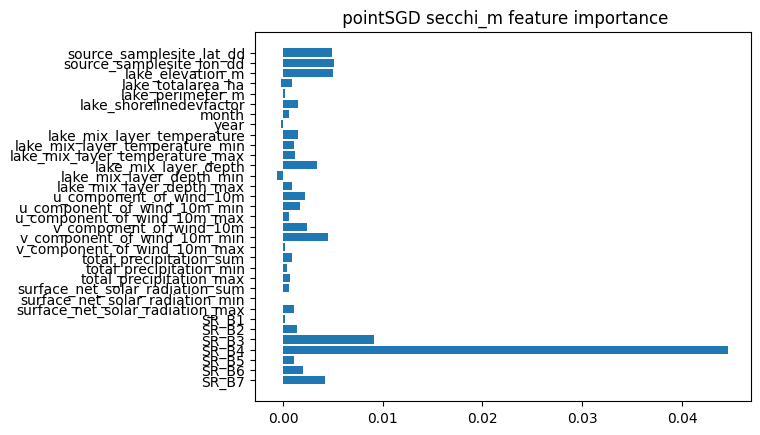

[ 4.75638117e-03  3.52286898e-03  3.26979009e-03  1.08621011e-03
  4.58467940e-03  1.63590712e-04  6.03987116e-04  1.39068262e-03
  7.42505715e-04 -1.51081324e-04  1.23598995e-03  5.26202848e-04
  9.19816925e-04  2.93045880e-03 -3.35860763e-04  9.37847391e-04
  1.54321173e-03  1.03403297e-03  4.05064336e-04  1.22467335e-03
  3.29198714e-03 -7.98898405e-05  7.84002772e-04  3.40578907e-04
  5.83460695e-04  4.21634927e-04  0.00000000e+00  1.11620273e-03
  1.44546134e-04  1.83305418e-03  6.49112410e-03  5.28149750e-02
  4.08151211e-04  4.40720140e-04  4.03932653e-03]


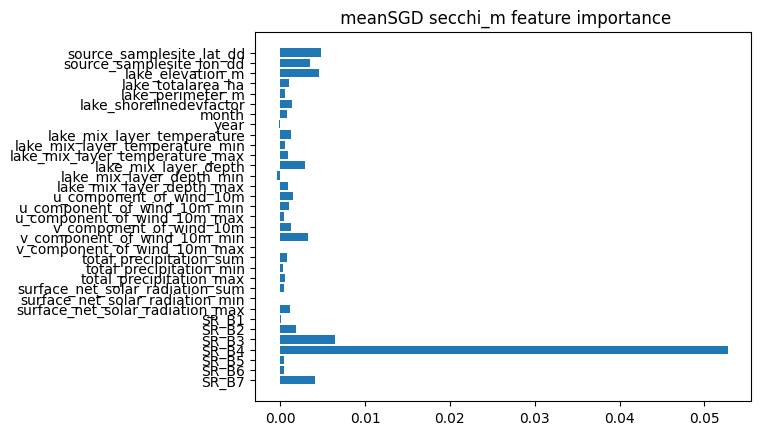

[ 4.33635113e-03  3.68949411e-03  3.72840978e-03  7.38650571e-04
  4.72978678e-03  2.95286868e-04  4.41387922e-04  1.46834414e-03
  4.55300129e-04 -1.89229119e-04  1.63153257e-03  7.44761368e-04
  9.60133153e-04  3.22697828e-03 -3.71294527e-04  6.71962600e-04
  1.85192614e-03  1.23335775e-03  4.67110711e-04  2.14843190e-03
  4.31246066e-03  9.63656543e-05  1.06587231e-03  4.11662193e-04
  5.64859398e-04  9.42810293e-05  0.00000000e+00  8.45097690e-04
  2.17127834e-04  2.22836750e-03  6.32700320e-03  6.93397502e-02
  9.31319476e-04  3.10349787e-04  5.81014135e-03]


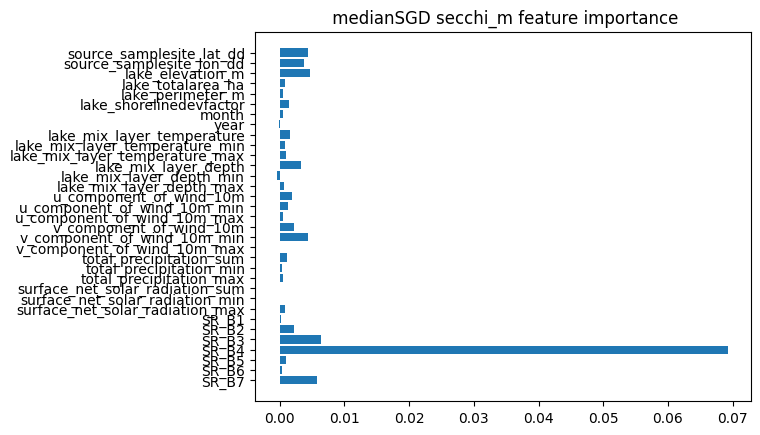

[0.0002457  0.00193917 0.00278396 0.00187765 0.00795324 0.00063905
 0.00188017 0.0003182  0.01075285 0.00160023 0.00225209 0.00200018
 0.00126711 0.00477123 0.00061559 0.00103767 0.00077682 0.00266735
 0.00038668 0.00234756 0.00288282 0.0008089  0.00112825 0.00059401
 0.0001605  0.00235168 0.         0.00319143 0.00140379 0.00026069
 0.01512766 0.05034993 0.00043522 0.00068135 0.00312978]


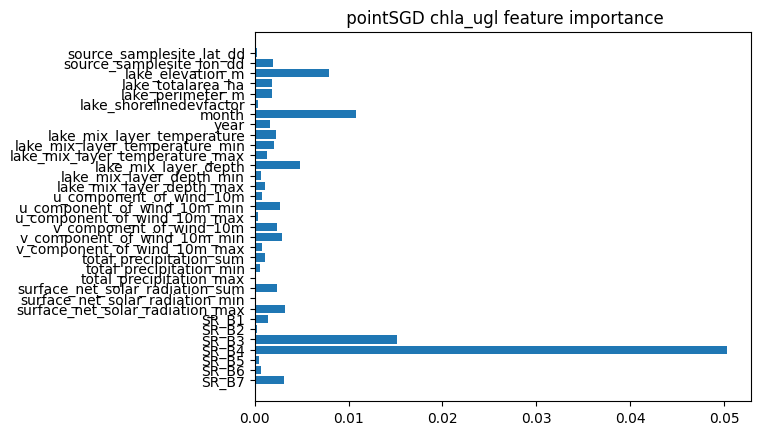

[0.00088514 0.00240372 0.00258737 0.00165665 0.00674207 0.0008175
 0.00177269 0.00040549 0.01017579 0.00155764 0.00284572 0.0020759
 0.00139438 0.0034421  0.00020178 0.00115268 0.00044911 0.00158205
 0.00053604 0.00181676 0.00269903 0.00076627 0.00154421 0.00070244
 0.00023821 0.00297718 0.         0.00273017 0.00094089 0.00129083
 0.01361386 0.0723989  0.00044071 0.00041478 0.00811419]


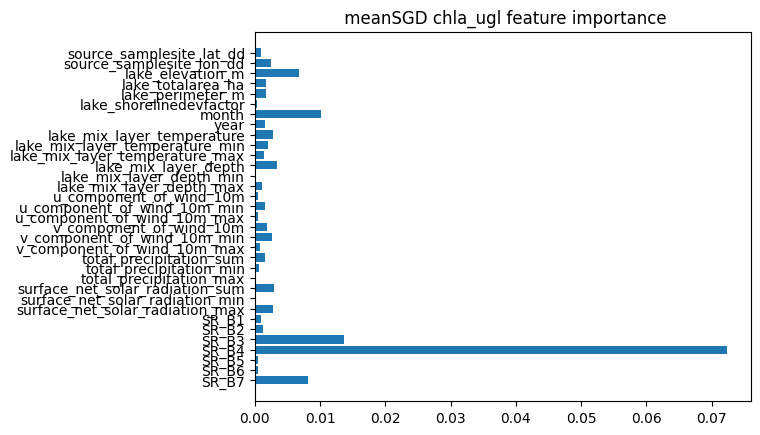

[0.00070076 0.00191543 0.00379688 0.00154282 0.00824716 0.00150281
 0.00125346 0.00034406 0.00907542 0.0009951  0.00264909 0.0028459
 0.00100386 0.00451986 0.00023492 0.00099612 0.00117703 0.00197854
 0.00061803 0.00355375 0.0036267  0.00070026 0.0016137  0.0007599
 0.00066683 0.00261274 0.         0.00291893 0.00170406 0.00124187
 0.01111278 0.08853683 0.00364606 0.00058966 0.00690744]


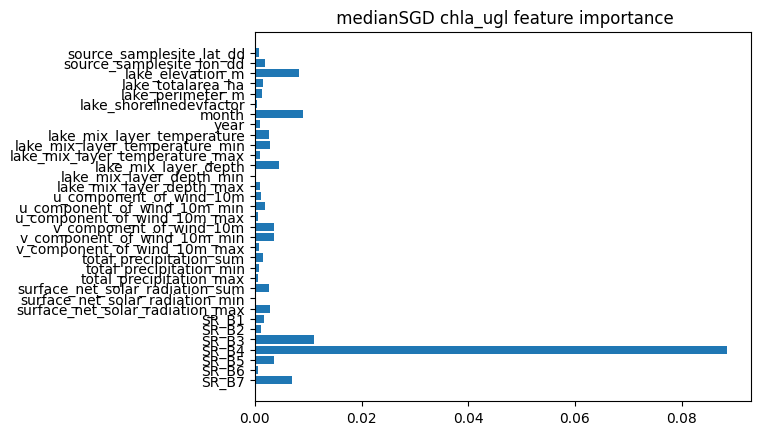

[ 1.73543677e-03  4.24898181e-03  3.20596170e-03  1.71992121e-03
  2.00589709e-03  5.21568090e-04  1.24024347e-03  1.42556717e-03
 -5.60172107e-04 -6.59038809e-05  1.52554684e-03  1.49972449e-03
  1.39208972e-03  1.22822394e-03  6.70889810e-04  1.45624070e-03
  1.98198998e-03  1.41192570e-03  1.63963825e-03  9.18181984e-04
  4.35527583e-04  1.52347223e-03  8.43719227e-04 -1.52336441e-05
  5.91763918e-04  6.70407128e-04  0.00000000e+00  9.21563237e-04
  1.27752970e-03  2.45052983e-04  3.84841097e-04  2.94477325e-03
  1.20407977e-03  1.04737517e-04  5.81483286e-04]


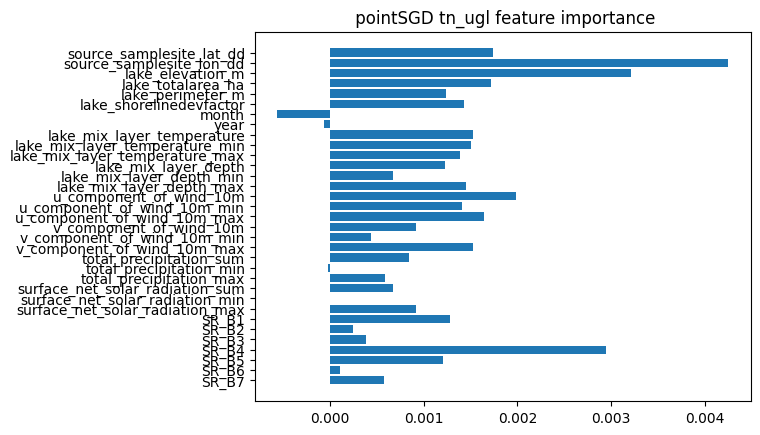

[ 1.95579848e-03  3.70044893e-03  3.16904790e-03  1.30232091e-03
  1.21278416e-03  3.55364569e-04  1.35328244e-03  1.29816297e-03
 -6.70871117e-04 -4.39798619e-04  1.34026887e-03  9.19949451e-04
  1.54934970e-03  9.62562743e-04  7.06141197e-04  9.53713355e-04
  1.78831210e-03  7.71623639e-04  1.64615542e-03  1.10504311e-03
  7.08352321e-04  1.76400354e-03  6.53322470e-04 -1.71198637e-07
  3.41746823e-04  7.82477363e-04  0.00000000e+00  6.05776374e-04
  4.09398296e-04  4.88344524e-04  3.52730316e-04  2.62011637e-03
  6.30823422e-04 -4.91821700e-05  9.26143483e-04]


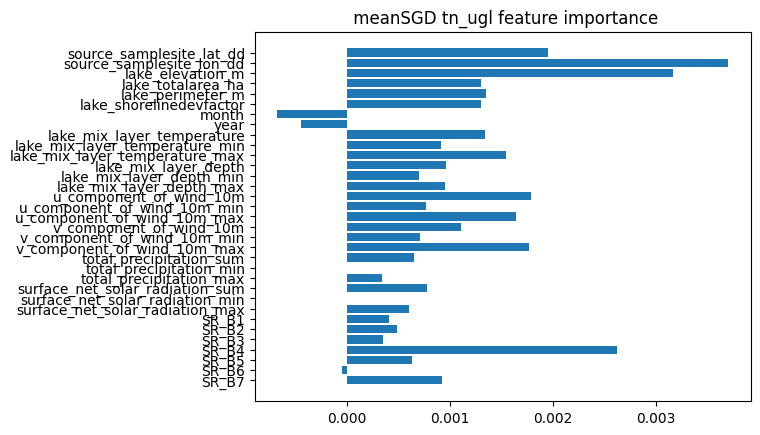

[ 8.93552559e-04  3.98516225e-03  3.97087014e-03  4.33081830e-04
  2.76729420e-03  9.15281518e-05  8.84809570e-04  5.57246455e-04
 -9.57496961e-04 -1.00573578e-04  1.15063754e-03  2.07210824e-03
  7.34605951e-04  9.98424896e-04  9.45795801e-04  4.02139544e-04
  7.18708263e-04  2.05767474e-03  1.29529478e-03  4.17175075e-04
  3.60967848e-04  2.48239214e-04  1.19612605e-04 -2.15996681e-05
  4.77979785e-04  2.96864810e-04  0.00000000e+00  6.27274973e-04
  9.52969547e-04  1.08363311e-03  3.57977372e-04  7.19127717e-03
  8.96340995e-04  4.99541192e-04  2.05818799e-04]


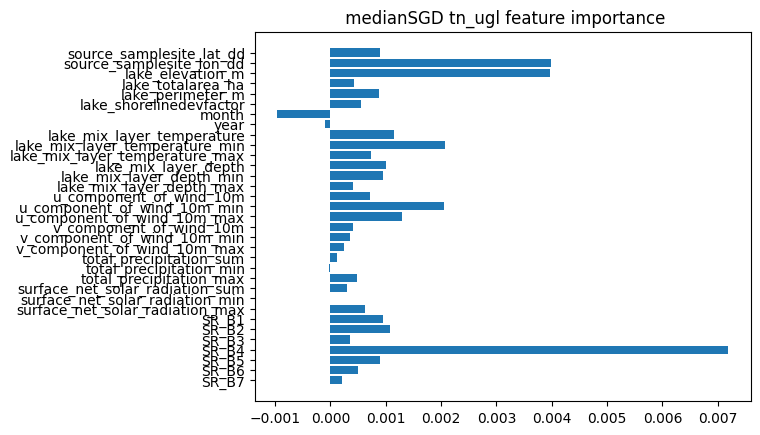

[ 2.99970588e-03  8.00939695e-04  2.65008004e-05  5.46425092e-04
  4.26000428e-04  9.31632059e-04  2.91835892e-04  1.18782625e-04
  4.05675199e-03 -1.86162187e-04  2.34227880e-03  9.91452401e-03
  4.85626387e-03  8.49917648e-04  5.38766228e-04  9.92887377e-04
  1.88640578e-04  1.22545113e-03  6.40279757e-04 -1.55042041e-04
  3.40832239e-04  6.78472442e-04  9.73405799e-04 -4.34846245e-06
 -5.36238032e-05 -1.24570619e-05  0.00000000e+00 -2.21561404e-04
  3.81034496e-05  1.36559970e-04  1.25898564e-03  6.98963408e-04
  4.29665185e-04  9.15927714e-04  5.28045996e-04]


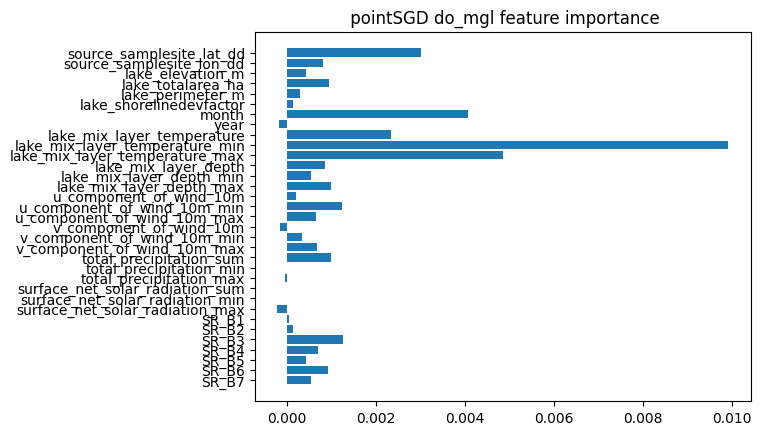

[ 3.40946188e-03  1.21510363e-03  7.03845745e-06  1.59142485e-04
  6.76968779e-04  1.00753138e-03  4.45864530e-04  2.02781223e-04
  3.83127125e-03 -2.06317278e-04  2.11307905e-03  1.06071282e-02
  4.01472882e-03  8.36124228e-04  4.44460248e-04  8.26094202e-04
  1.57323909e-04  8.31629565e-04  7.94224347e-04 -2.22154588e-05
  4.04229580e-04  3.71848737e-04  6.72384674e-04 -3.45994131e-06
 -3.34670352e-05 -3.46460456e-06  0.00000000e+00 -4.44513905e-04
 -3.08405293e-04 -1.80950858e-04  1.13519529e-03  1.06529818e-03
  6.30175785e-04  1.49209866e-03  1.99498622e-04]


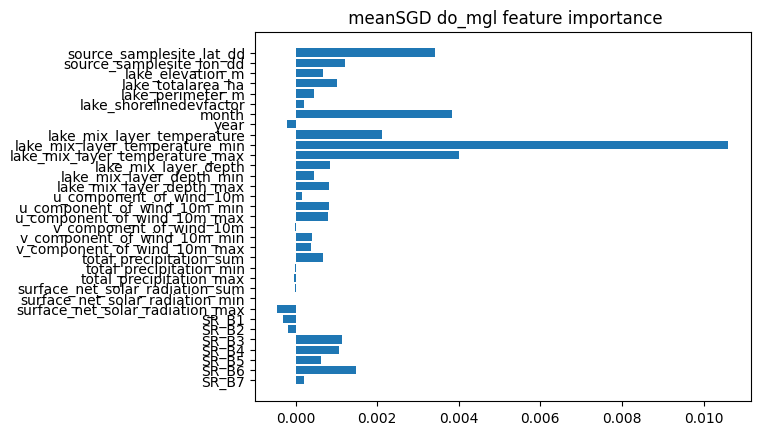

[ 3.39016166e-03  1.05295542e-03 -1.09362555e-04  3.48491091e-04
  6.56446141e-04  1.46228444e-03  2.28271558e-04  1.19139969e-04
  3.66439080e-03 -7.28044018e-05  2.18210997e-03  1.01790129e-02
  4.33786718e-03  8.46809672e-04  4.74066073e-04  6.03040765e-04
  4.74894449e-05  1.34244308e-03  6.29880196e-04 -1.65161205e-04
  4.41636859e-04  4.96491356e-04  7.10337067e-04 -8.45764408e-05
  5.53793717e-05 -9.82180841e-05  0.00000000e+00 -2.50674840e-04
 -5.69137972e-04  5.43616324e-04  7.83617338e-04  7.61800185e-04
  8.39061778e-04  5.26395368e-04 -1.29277132e-04]


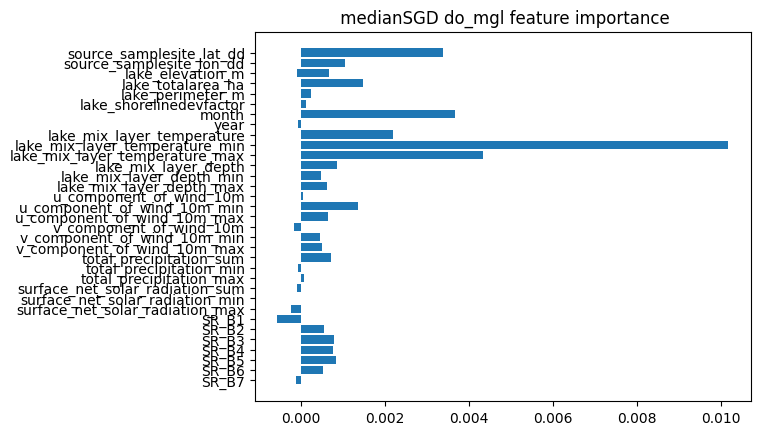

[ 6.13436494e-03  2.01128443e-03  8.11079494e-04  1.72096933e-03
  2.23232266e-03  6.23109642e-04  6.83252209e-04  9.12213564e-04
  1.64394076e-04 -2.39378605e-04  4.88377299e-04 -3.48824766e-05
  5.23138877e-04  7.77969461e-04  3.53164046e-04  8.53823469e-04
  4.80815756e-04  3.52108326e-04  5.86528441e-04  6.91560774e-05
  4.02789855e-04  3.48958406e-04  1.76554738e-04 -1.79075179e-04
  4.10040505e-04 -1.15649142e-04  0.00000000e+00  2.59059535e-04
  8.98764972e-05  7.10152253e-05  3.43842118e-03  9.60236532e-04
  2.80960603e-04  5.35482899e-04  1.38723675e-03]


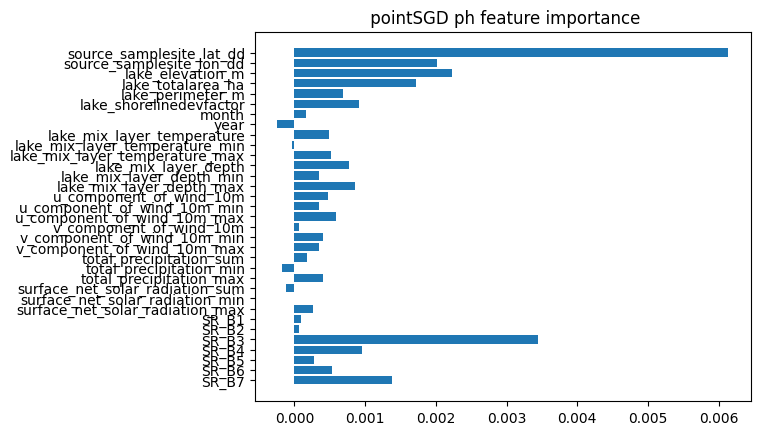

[ 6.28937732e-03  1.88094511e-03  1.32334087e-03  1.74498459e-03
  2.12203054e-03  7.48518069e-04  6.02671616e-04  6.95573532e-04
  3.84338004e-04 -3.11424576e-04  4.88554579e-04  4.40414038e-05
  5.80339428e-04  4.98974947e-04  3.04891701e-04  6.95779521e-04
  3.66869599e-04  2.44508889e-04  7.23211106e-04  2.44438408e-04
  2.51810319e-04  1.17161243e-04  1.85483348e-04 -2.28268003e-04
  5.03938395e-04 -1.12937834e-04  0.00000000e+00  3.48594210e-04
  4.04772222e-04  1.01982950e-03  4.03174045e-03  1.90267205e-03
 -1.40926496e-04  1.57001470e-03  9.97382551e-04]


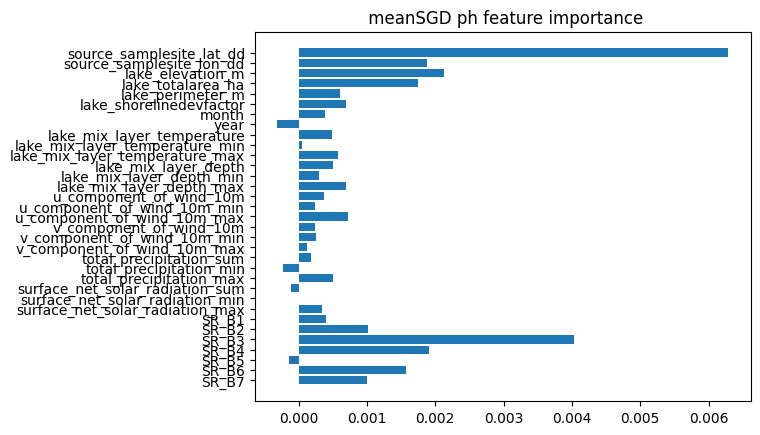

[ 6.25572481e-03  1.96979008e-03  1.01686980e-03  1.81444255e-03
  1.89417339e-03  8.54784810e-04  8.69446330e-04  6.89689164e-04
  3.21257994e-04 -2.96259980e-04  4.24742430e-04  1.57688168e-04
  5.41377599e-04  5.09946387e-04  1.93665638e-05  9.34605341e-04
  4.98289825e-04  4.68043958e-04  7.00498393e-04  1.62889904e-05
  3.69163107e-04  1.43199038e-04  2.06075469e-04 -1.83843071e-04
  3.77056350e-04 -1.22407585e-04  0.00000000e+00  3.82012806e-04
 -1.89694250e-04  1.06016589e-03  3.57291628e-03  1.78235373e-03
  2.12826905e-04  2.25136467e-04  1.96792686e-04]


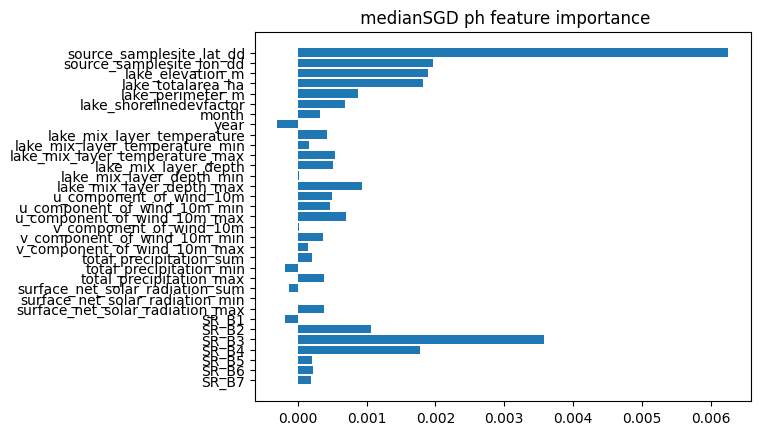

[ 9.08442234e-04  2.22702444e-03  3.14733966e-03  1.59151016e-04
  4.16193343e-03  6.37842977e-04  7.03731695e-04  3.70392020e-04
  6.72373744e-04 -3.04606915e-05  3.74577260e-04  2.71061074e-03
  6.51144850e-04  1.05344346e-03  8.68274086e-05  7.98076513e-04
  3.10238098e-04  3.44327429e-03  1.74422013e-03  1.24723107e-03
  2.99787346e-04  3.06557322e-04 -1.54400044e-04  3.90436215e-04
  5.82536984e-04 -1.35292405e-04  0.00000000e+00 -1.63889785e-04
  8.41548355e-04  6.25235425e-04  2.58072181e-03  2.30801226e-02
  5.91706045e-04  6.56818100e-04  2.68575390e-03]


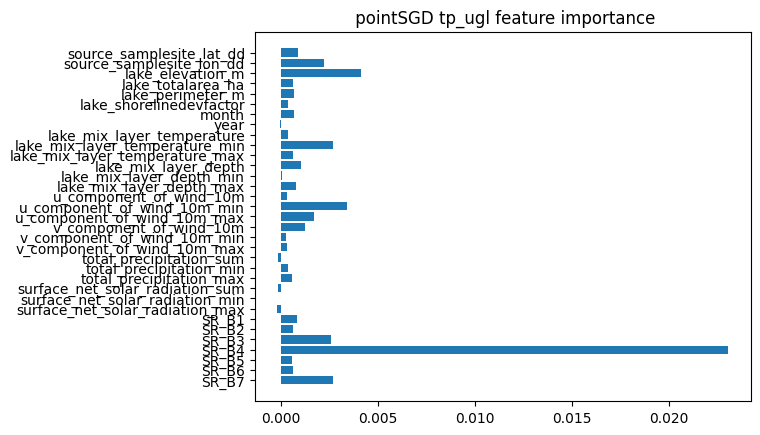

[ 9.83870979e-04  1.91461090e-03  4.24979737e-03  5.53667189e-04
  4.31479055e-03  7.76585642e-04  1.02100182e-03  3.84193254e-04
  4.95004059e-04 -2.98536050e-05  6.26763864e-04  2.99862814e-03
  8.64486015e-04  1.20550807e-03  3.45343940e-04  6.97723215e-04
  6.26718055e-04  2.96537630e-03  1.39061191e-03  1.06978283e-03
  3.86408711e-04  4.11172644e-04 -2.70407366e-04  5.31631467e-04
  5.73600018e-04 -7.68437583e-05  0.00000000e+00 -1.71677957e-04
  4.97576899e-04  2.55737378e-04  2.30322771e-03  3.27449999e-02
  3.24336251e-05  5.98997198e-04  1.63838969e-03]


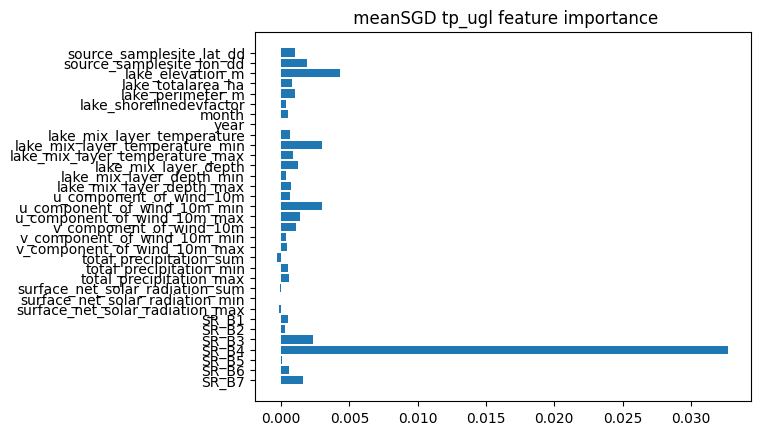

[ 1.01723120e-03  1.64928272e-03  4.83622653e-03  3.68783951e-04
  5.02347576e-03  1.12788546e-03  1.15779741e-03  5.72297936e-04
  3.27569552e-04  1.36474469e-05  7.14902208e-04  3.40808511e-03
  1.06937414e-03  1.45629430e-03  2.20892635e-04  5.39626894e-04
  5.51125547e-04  3.24135675e-03  1.55959534e-03  1.72443652e-03
  2.88541481e-04  4.24331937e-04 -2.34574622e-04  3.33643369e-04
  7.20732733e-04 -2.23312647e-04  0.00000000e+00 -1.99816238e-04
  2.58746462e-04  1.81804086e-04  1.55256542e-03  3.67455707e-02
  1.24001970e-03  3.43166042e-04  2.25292007e-03]


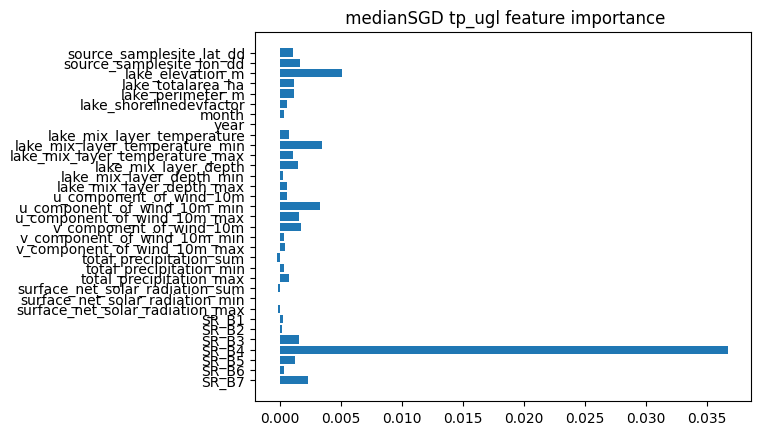

[ 0.00462705  0.02055113  0.00595355  0.00117436  0.00463017  0.00279546
  0.00085525  0.00104391  0.00867761  0.00195898  0.0019535   0.00024369
  0.00418462  0.00319685  0.00172971  0.00265957  0.00048371 -0.00027392
  0.00788846  0.00188786  0.0037769   0.00067622 -0.00028163  0.0007312
  0.0031057   0.00113811  0.          0.00407573  0.00094254  0.00478509
  0.00463136  0.00267741  0.00025963  0.0013878   0.00146009]


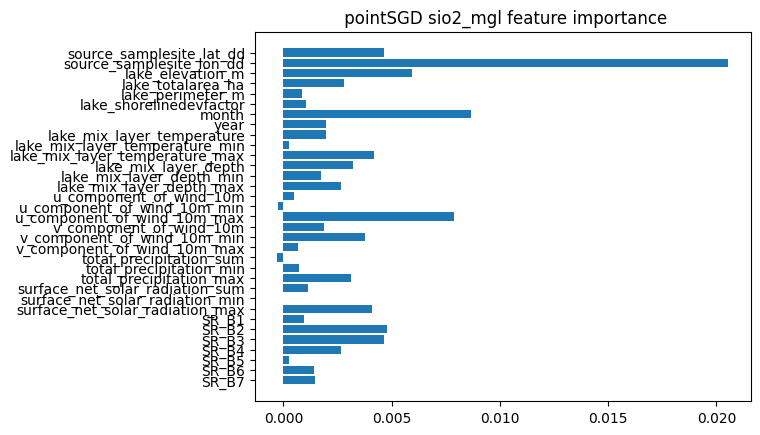

[ 4.46578962e-03  1.56372009e-02  6.21958045e-03  5.45307277e-04
  3.65830439e-03  4.43068574e-03  1.42834450e-03  2.20724806e-03
  8.51131323e-03  9.36719785e-04  1.95816495e-03 -2.46045020e-05
  3.61014282e-03  4.07468496e-03 -2.71103822e-04  2.53301096e-03
  1.31969045e-03  5.28704062e-04  5.68673658e-03  2.83088339e-03
  2.40225948e-03  1.61133341e-03  7.14374149e-05  2.04739657e-04
  3.30185688e-03  1.18058195e-03  0.00000000e+00  2.75375188e-03
  1.08734384e-03  4.24899522e-03  4.71079457e-03  4.77075780e-03
 -2.60396834e-04  7.43740014e-04  1.44235463e-03]


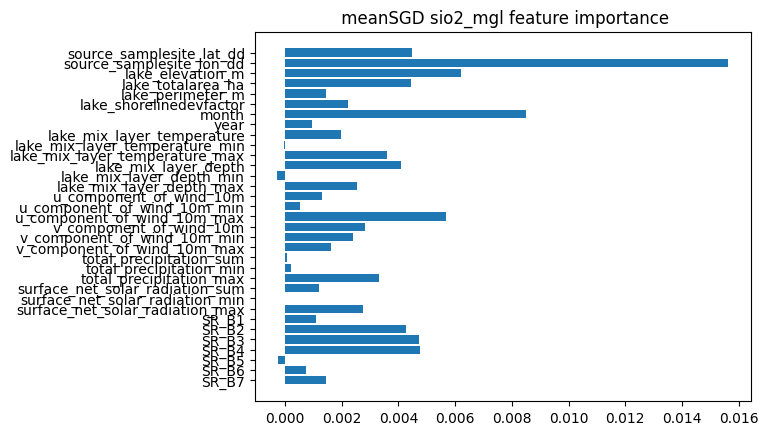

[ 4.49104076e-03  1.60928222e-02  5.79050813e-03  9.33855264e-04
  5.29278039e-03  3.65716088e-03  1.50903250e-03  1.69645217e-03
  9.58472564e-03  1.88718762e-03  1.67028116e-03  2.68321907e-05
  3.94159817e-03  3.15154930e-03  1.44291759e-03  3.10914094e-03
  8.72777818e-04  6.14345807e-04  6.92586880e-03  2.70209952e-03
  2.79912393e-03  1.97920136e-04  3.63722294e-04 -1.77350827e-04
  2.65895946e-03  1.15244775e-03  0.00000000e+00  5.24269975e-03
  2.04703573e-03  4.79059300e-03  4.79174077e-03  2.88847137e-03
 -9.98766673e-05  1.21296838e-03  2.08807004e-04]


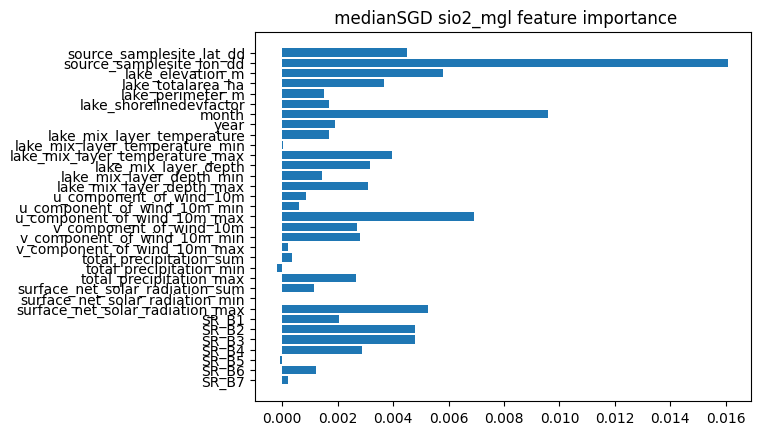

[ 2.67669939e-03  1.96253511e-03  7.46931765e-03  4.65443640e-03
  1.09625286e-02  5.18688334e-03  7.04244690e-03  1.25776669e-03
  6.01007249e-04  1.22194598e-03  4.21313091e-03  3.30966062e-03
  1.55298082e-03  1.84765532e-03  8.27802678e-04  1.63526671e-03
  7.77075804e-04  1.56281361e-03  1.07875948e-03  1.03088057e-04
  3.07477262e-04  7.39694083e-04 -5.71803331e-04  8.99394481e-06
 -1.21590648e-03 -1.86292715e-03  0.00000000e+00 -4.41724291e-04
  7.13534348e-04  1.67063328e-03  1.44156675e-03  1.63255231e-03
  1.97794799e-03  7.12999487e-04  1.18688092e-03]


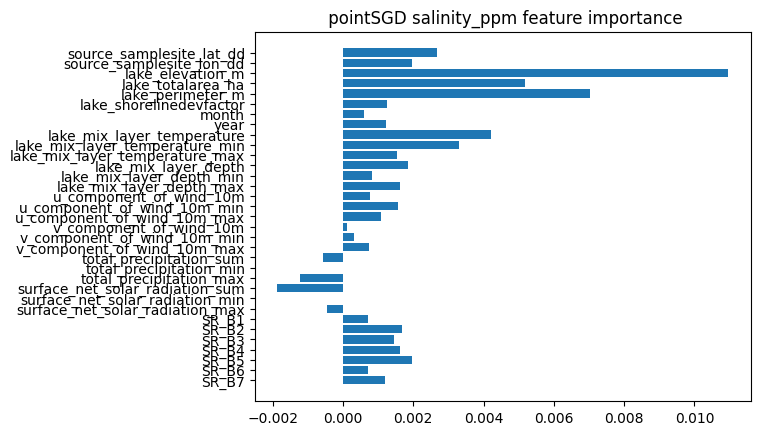

[ 2.85637555e-03  1.64854592e-03  5.65380675e-03  4.48477762e-03
  1.05311375e-02  4.55626726e-03  5.52479803e-03  1.15702148e-03
  7.36864502e-04 -1.10913828e-03  2.85797384e-03  3.56328372e-03
  1.61601421e-03  2.33682592e-04  1.44766446e-03  1.76150770e-04
  2.06133116e-03  1.49649807e-03 -1.18168607e-04 -5.68949616e-04
  5.76733246e-04  1.47240675e-03 -3.01100606e-04 -5.82123427e-05
 -6.27428346e-04 -1.14124316e-03  0.00000000e+00 -4.60009277e-04
 -3.39537489e-04  1.06808967e-03  7.80791326e-04  1.12480038e-03
  4.62526746e-03 -1.61354908e-03  4.81459759e-05]


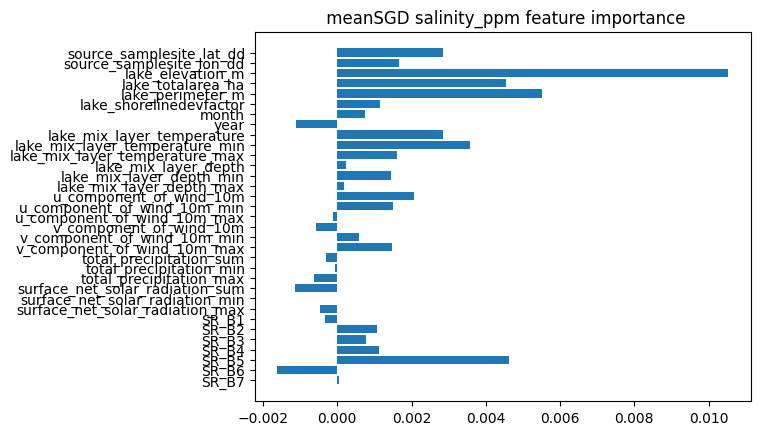

[ 2.54626354e-03  2.15112122e-03  6.82312008e-03  5.06274866e-03
  1.17446344e-02  5.12778272e-03  7.08885211e-03  6.52598901e-04
  7.51793736e-04  8.71006704e-04  4.09297807e-03  3.56351634e-03
  1.73465401e-03  1.43603393e-03  1.49118087e-03  1.84398465e-03
  1.55665547e-03  1.62897505e-03  8.83940526e-04 -5.92229846e-04
  6.47335525e-04  6.85594295e-04  8.23876285e-04 -5.75245084e-06
 -3.37360410e-04 -8.46428613e-04  0.00000000e+00  5.67312933e-04
 -3.28241968e-04  2.30740284e-03  8.21360072e-04  1.38398832e-03
  2.73422472e-03 -2.30111698e-04  2.38957467e-04]


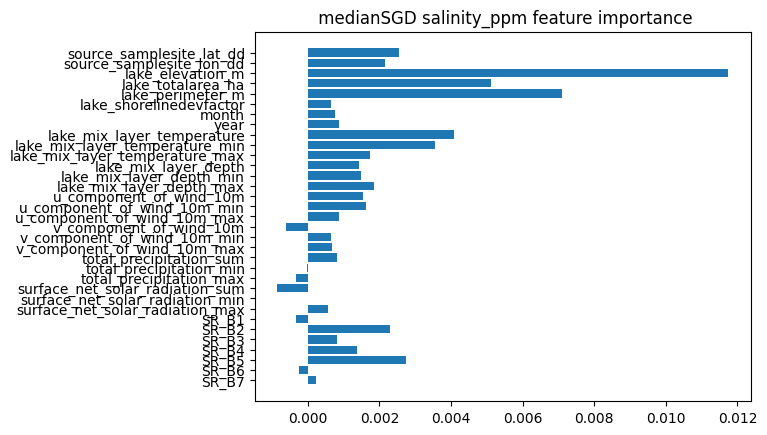

In [18]:
reduction_methods = [' point', ' mean', ' median']
for key in num_to_param.keys():
    for reduction_method in reduction_methods:
        permute_importance(dataset,reduction_method,key, models_1[reduction_method]['train'][key]['SVR']['model'],"SGD")

[ 6.16008541e-02  5.35059790e-02  6.71259184e-04  4.46366588e-03
  6.71259184e-04  4.46366588e-03  1.33595503e-03  2.13050489e-04
  3.54464646e-03  3.39906298e-03 -9.08629062e-05 -7.78209163e-05
 -1.50212497e-04  8.80742075e-05  3.14678472e-05  2.58133788e-04
  2.23455593e-04  6.91159450e-04  6.49122974e-04  2.12729405e-04
  6.00674627e-04  1.54774711e-03  9.26017802e-07  0.00000000e+00
  0.00000000e+00  7.92542650e-03  0.00000000e+00 -5.24990576e-05
  3.86875976e-07 -1.96843045e-07  2.55853007e-06  1.43647430e-06
  1.36308927e-06  2.76224309e-07  1.69590703e-07]


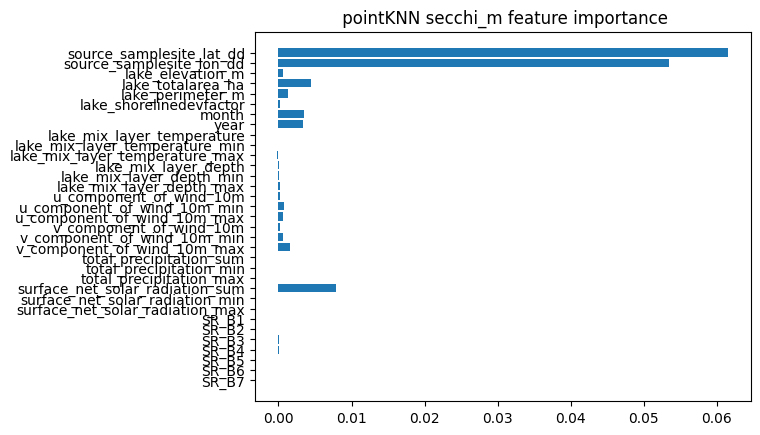

[ 6.15843446e-02  5.35004112e-02  6.73463816e-04  4.45508943e-03
  6.73463816e-04  4.45508943e-03  1.32761249e-03  1.99163347e-04
  3.53362710e-03  3.38692035e-03 -1.08834780e-04 -9.77336347e-05
 -1.68322271e-04  8.25903539e-05  1.77982875e-05  2.42062633e-04
  2.18003405e-04  6.83239062e-04  6.36577430e-04  2.03632301e-04
  5.97011566e-04  1.53698126e-03 -3.36510925e-07  0.00000000e+00
  0.00000000e+00  7.91085890e-03  0.00000000e+00 -6.75046646e-05
 -7.55937190e-08 -3.45704871e-07  7.24601027e-08  1.44123282e-06
 -1.19636253e-05 -6.06483381e-06 -3.34474004e-06]


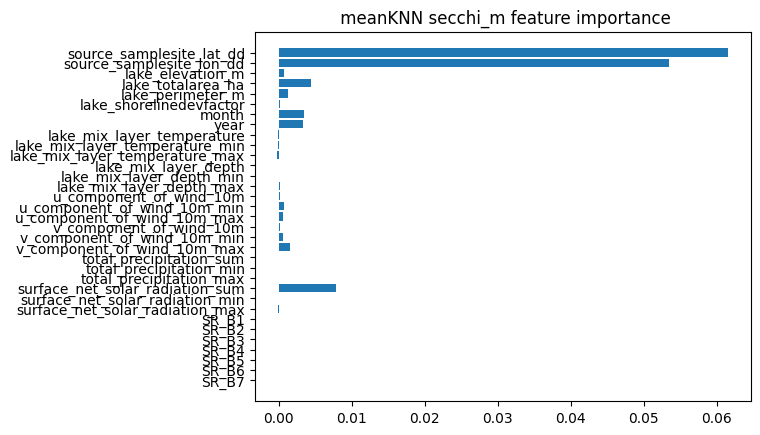

[ 6.15933273e-02  5.35085922e-02  6.84947632e-04  4.46370321e-03
  6.84947632e-04  4.46370321e-03  1.33975285e-03  2.12899346e-04
  3.54017049e-03  3.39764562e-03 -9.80428646e-05 -8.54978746e-05
 -1.59174573e-04  8.95422465e-05  3.00472010e-05  2.51623674e-04
  2.26035919e-04  6.92966428e-04  6.47773104e-04  2.11686748e-04
  6.04315614e-04  1.54804112e-03  7.21002977e-07  0.00000000e+00
  0.00000000e+00  7.92142675e-03  0.00000000e+00 -5.71340648e-05
  3.21973746e-08  1.01941827e-06  2.36749011e-06  3.56515619e-06
 -4.99109752e-08 -7.38628351e-08  4.82074384e-07]


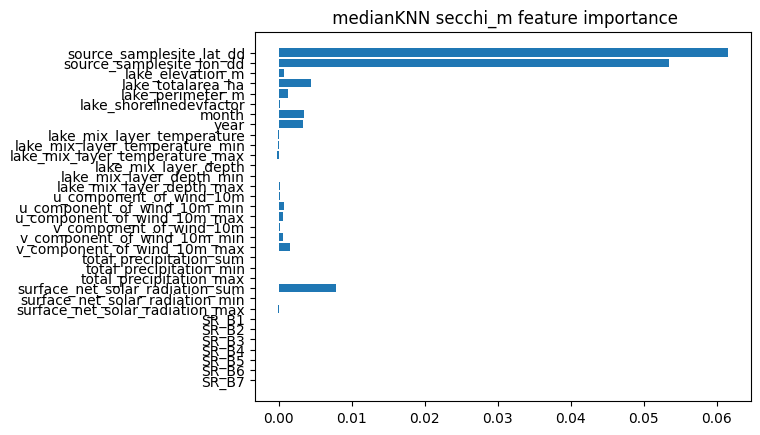

[5.45544375e-02 7.37750738e-02 1.51918769e-03 4.80265302e-03
 1.51918769e-03 4.80265302e-03 1.68627395e-03 2.34988627e-04
 1.43059748e-02 8.69538311e-03 3.36176299e-04 4.37944070e-04
 3.37221777e-04 4.34988415e-04 4.49058037e-04 3.39961307e-04
 3.12032414e-03 1.64230781e-03 3.60129072e-03 6.55424003e-04
 2.36104867e-03 3.83220466e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.75748947e-02 0.00000000e+00 7.71563437e-05
 3.15676014e-06 3.15676014e-06 8.99550272e-06 2.77316174e-06
 4.05228802e-06 2.80034373e-06 1.62055190e-06]


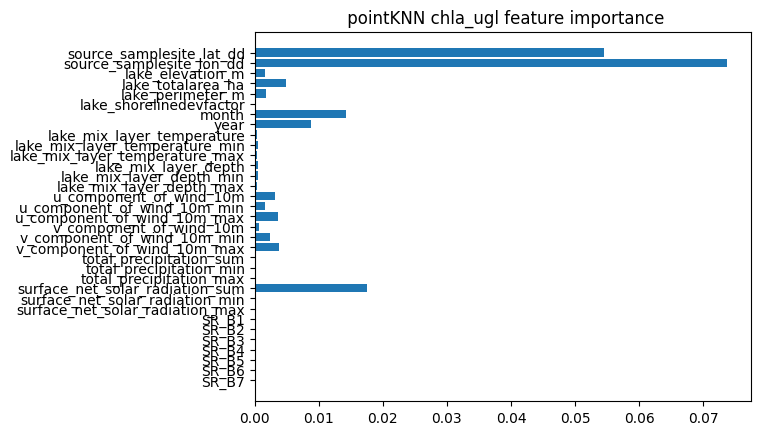

[ 5.45991429e-02  7.38173196e-02  1.55874304e-03  4.86785847e-03
  1.55874304e-03  4.86785847e-03  1.73199337e-03  2.95249990e-04
  1.43356002e-02  8.77820369e-03  3.69935316e-04  4.65124513e-04
  3.60253049e-04  4.70818326e-04  5.02341018e-04  3.86068849e-04
  3.15430911e-03  1.68431212e-03  3.65280838e-03  7.03761955e-04
  2.42181187e-03  3.87373593e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.76208357e-02  0.00000000e+00  1.21610102e-04
  0.00000000e+00 -2.73726875e-07  1.44433775e-07 -1.27744716e-06
  2.85412245e-05  1.88773455e-05  1.67050337e-06]


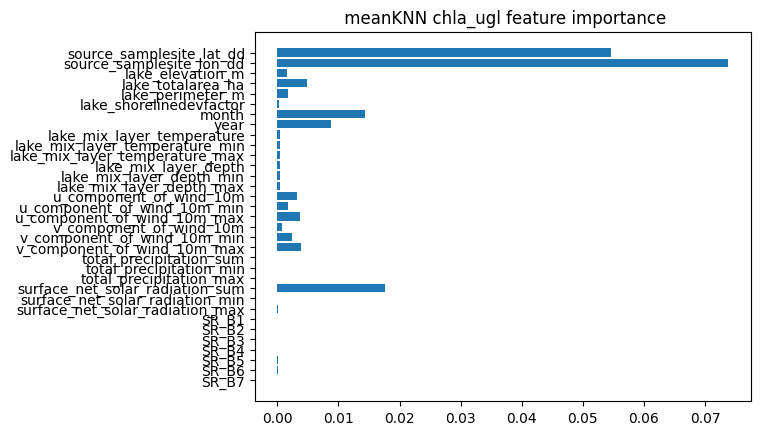

[ 5.45501173e-02  7.37736671e-02  1.50901652e-03  4.81499174e-03
  1.50901652e-03  4.81499174e-03  1.68750995e-03  2.42330488e-04
  1.43029342e-02  8.70397230e-03  3.20964833e-04  4.23240496e-04
  3.19044333e-04  4.34295744e-04  4.56462769e-04  3.33046100e-04
  3.10609021e-03  1.64026819e-03  3.60931255e-03  6.66979233e-04
  2.36958051e-03  3.82518149e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.75694692e-02  0.00000000e+00  8.24189418e-05
  0.00000000e+00  0.00000000e+00  1.40370962e-06  0.00000000e+00
 -6.34575189e-06  1.85104697e-06  1.45082060e-06]


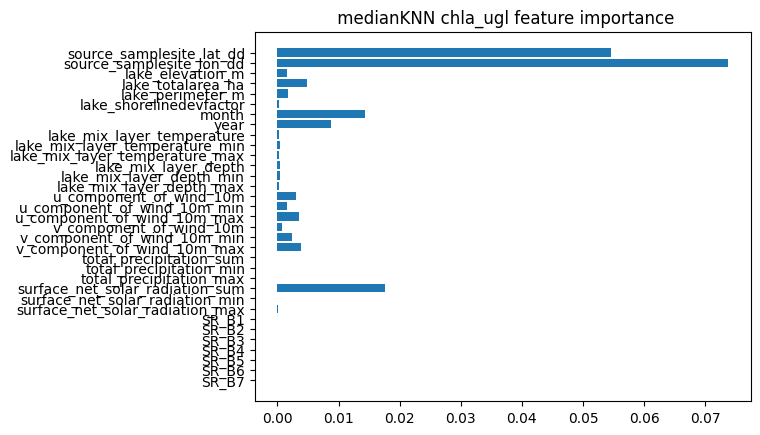

[ 1.03471268e-02  4.93760566e-02 -7.63094360e-05  1.17967940e-03
 -7.63094360e-05  1.17967940e-03  8.81553704e-04  1.46998022e-04
  4.59184234e-05  7.81931016e-04  1.47110924e-04  1.38609927e-04
  1.40265390e-04  8.73955394e-05  1.00757264e-04  7.30577283e-05
 -3.19263916e-04  1.40206256e-04  7.87683457e-05 -2.26321396e-04
 -1.37212376e-04  1.20125752e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.14073256e-03  0.00000000e+00 -6.15781779e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.33301952e-08  1.26660390e-07  6.33301952e-08]


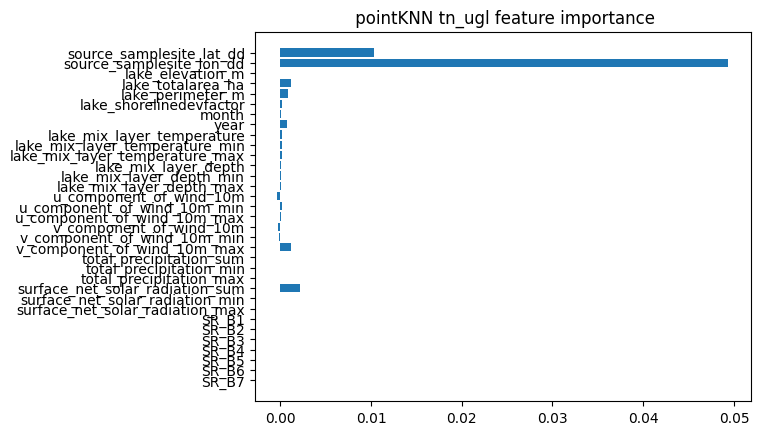

[ 1.03426582e-02  4.93688335e-02 -8.11307786e-05  1.17403577e-03
 -8.11307786e-05  1.17403577e-03  8.81920309e-04  1.40604157e-04
  4.40658498e-05  7.53461690e-04  1.44552367e-04  1.36706086e-04
  1.37466923e-04  8.60870231e-05  9.44284752e-05  7.01286299e-05
 -3.23325810e-04  1.34440075e-04  7.20362150e-05 -2.29993951e-04
 -1.38686907e-04  1.19708455e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.13745407e-03  0.00000000e+00 -6.53402830e-05
  0.00000000e+00  0.00000000e+00 -6.77210275e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


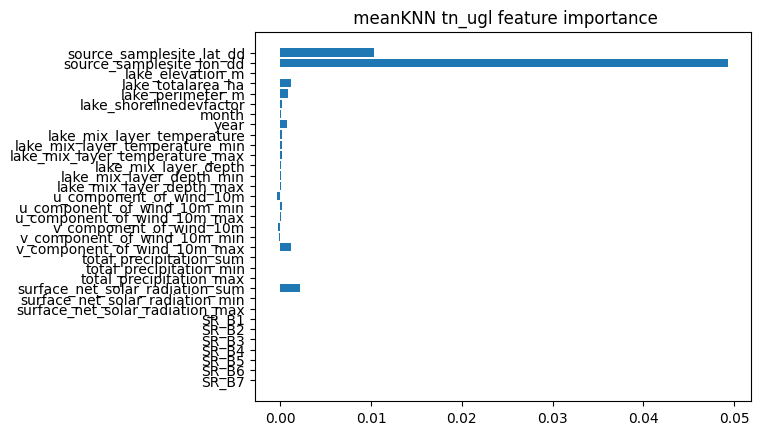

[ 1.03418027e-02  4.93690928e-02 -8.09483407e-05  1.17734325e-03
 -8.09483407e-05  1.17734325e-03  8.79632588e-04  1.40606692e-04
  4.45493982e-05  7.79137989e-04  1.42629490e-04  1.34565117e-04
  1.35827222e-04  8.54432689e-05  9.62362008e-05  6.75068843e-05
 -3.20078641e-04  1.35760002e-04  7.43112154e-05 -2.29978808e-04
 -1.40069132e-04  1.19474283e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.13704724e-03  0.00000000e+00 -6.59352748e-05
  0.00000000e+00  0.00000000e+00 -6.77210275e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


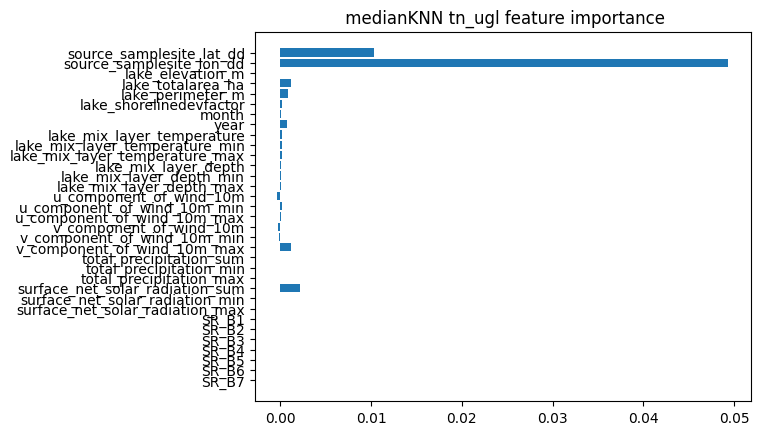

[ 1.20646717e-02  1.30799737e-02  5.52044392e-04  3.70911082e-04
  5.52044392e-04  3.70911082e-04  5.23341812e-04  1.71267605e-04
  1.57885321e-02  1.15683680e-03  6.60241373e-04  7.07691351e-04
  5.87524547e-04  6.36631463e-05  1.08159193e-04  5.71945000e-05
 -1.06373916e-03 -3.42121257e-04 -6.67603596e-04 -1.54930464e-03
 -1.34139060e-03 -2.49619460e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.21464353e-03  0.00000000e+00  4.87117659e-06
  0.00000000e+00  0.00000000e+00  3.43372164e-07  3.43372164e-07
  1.81855442e-07  9.35579785e-09  0.00000000e+00]


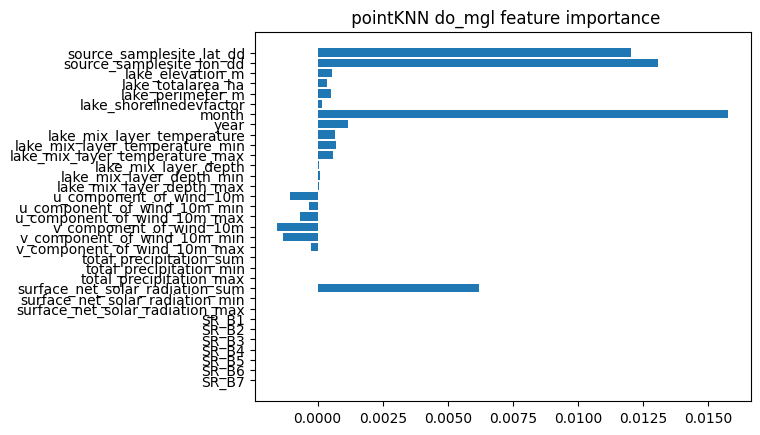

[ 1.20589240e-02  1.30711924e-02  5.57969103e-04  3.59828863e-04
  5.57969103e-04  3.59828863e-04  5.22820530e-04  1.70722064e-04
  1.57783976e-02  1.15093028e-03  6.56679148e-04  7.03410895e-04
  5.80865413e-04  5.50932619e-05  1.06691239e-04  5.40337620e-05
 -1.05893619e-03 -3.41262962e-04 -6.63384486e-04 -1.54682488e-03
 -1.33561528e-03 -2.49539901e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.21764144e-03  0.00000000e+00  2.41994045e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.02216420e-07  0.00000000e+00  0.00000000e+00]


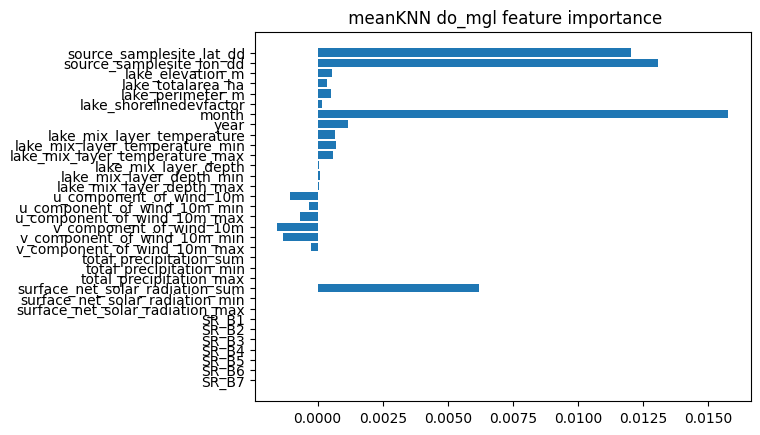

[ 1.20604382e-02  1.30728545e-02  5.57438581e-04  3.61766549e-04
  5.57438581e-04  3.61766549e-04  5.20662477e-04  1.67572585e-04
  1.57806288e-02  1.15213992e-03  6.55364541e-04  7.01215971e-04
  5.79552893e-04  4.82441974e-05  1.02439176e-04  5.15408764e-05
 -1.05823579e-03 -3.45096785e-04 -6.63898129e-04 -1.54803999e-03
 -1.33808227e-03 -2.51924682e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.21599048e-03  0.00000000e+00  9.22694730e-07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


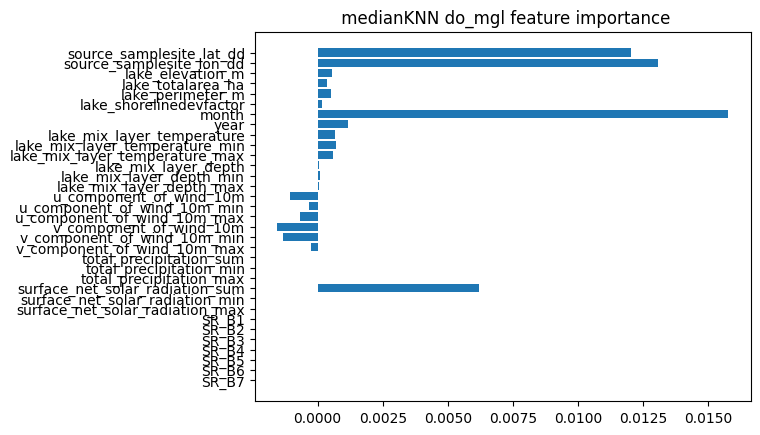

[ 2.70756135e-02  2.74608380e-02  5.90574795e-04  1.64879962e-03
  5.90574795e-04  1.64879962e-03  6.36985455e-04  1.01032896e-04
  5.28025454e-04  1.15829179e-03  1.56524678e-04  1.50982075e-04
  1.51843838e-04  1.22742034e-04  1.77934393e-04  1.37483816e-04
 -2.95603238e-04 -3.07251393e-04 -1.54401561e-04  2.51135839e-04
  4.91509586e-04  2.82166152e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.26024179e-03  0.00000000e+00  1.48532289e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.51866968e-07 -7.37707727e-08  0.00000000e+00]


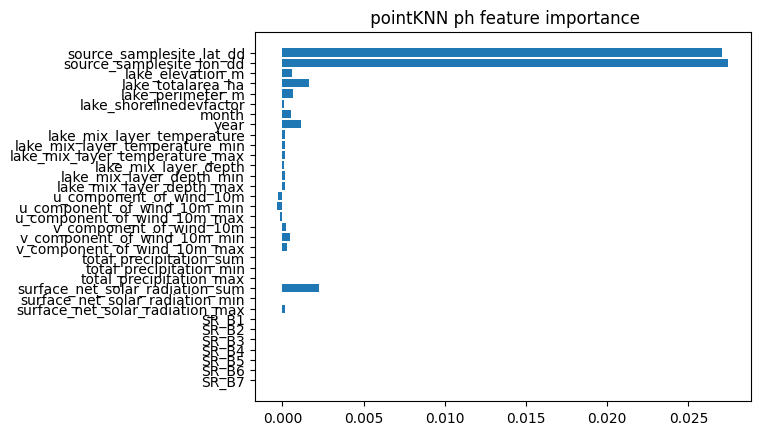

[ 2.70765058e-02  2.74601539e-02  5.88412028e-04  1.64775484e-03
  5.88412028e-04  1.64775484e-03  6.32322803e-04  1.02822292e-04
  5.21965947e-04  1.14683675e-03  1.54875092e-04  1.51611979e-04
  1.51073779e-04  1.36214098e-04  1.84042663e-04  1.51259315e-04
 -2.93605232e-04 -3.09112162e-04 -1.54519801e-04  2.51453269e-04
  4.84808226e-04  2.75200581e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.25692896e-03  0.00000000e+00  1.47908114e-04
  0.00000000e+00  0.00000000e+00  3.53869507e-08  0.00000000e+00
 -1.10372212e-06  0.00000000e+00  0.00000000e+00]


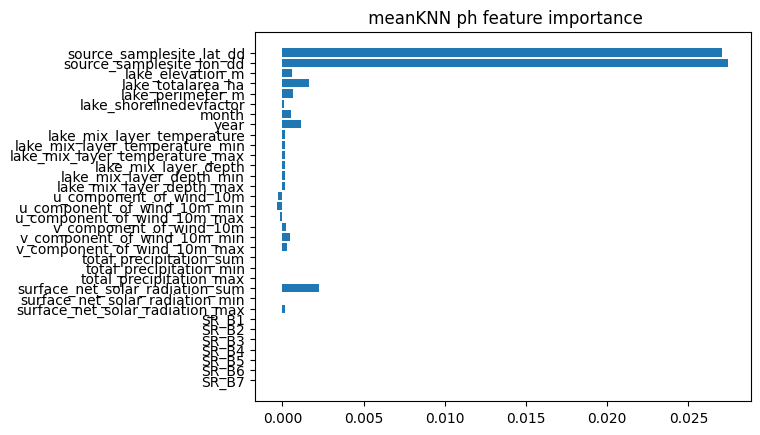

[ 0.02707646  0.02745982  0.00058713  0.00164815  0.00058713  0.00164815
  0.00063261  0.00010262  0.00052243  0.00115077  0.00015393  0.00015019
  0.00015136  0.00013637  0.00018627  0.00015608 -0.00029417 -0.00030871
 -0.00015421  0.00024979  0.00048488  0.00027445  0.          0.
  0.          0.00225618  0.          0.00014952  0.          0.
  0.          0.          0.          0.          0.        ]


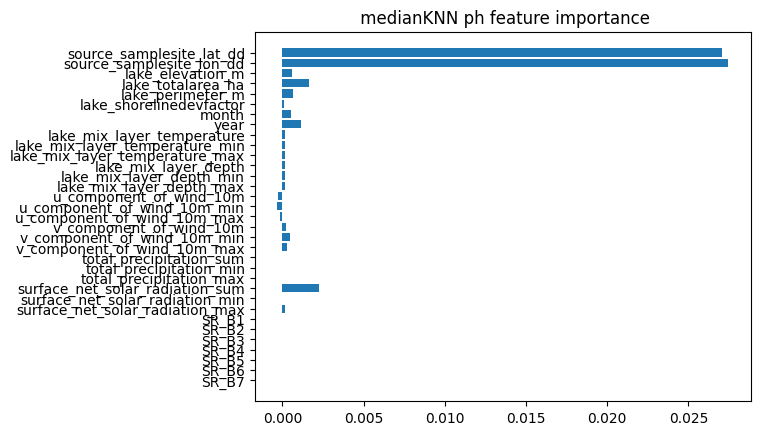

[ 4.62950478e-02  4.44927040e-02  4.64064958e-03  4.25011759e-03
  4.64064958e-03  4.25011759e-03  2.24954761e-03  2.31946829e-04
  2.69248700e-03  1.28652931e-03  2.20014582e-06  5.96369702e-05
  4.43352258e-05  2.02046045e-04  1.96517255e-04  2.90601041e-04
  4.92761221e-04  2.70806176e-03  1.48906044e-03  2.72182970e-04
  1.00654057e-03  2.51462368e-03  8.13113636e-08  0.00000000e+00
  0.00000000e+00  6.01681508e-03  0.00000000e+00  2.76984663e-04
  0.00000000e+00  8.13113636e-08 -3.20568892e-05  8.60968413e-07
  6.39012444e-06  9.83187838e-08  9.99038568e-08]


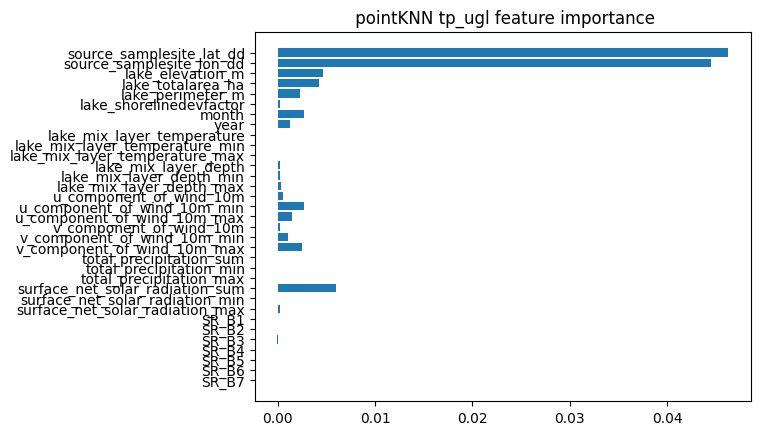

[ 4.62831775e-02  4.44800481e-02  4.62977149e-03  4.24254141e-03
  4.62977149e-03  4.24254141e-03  2.23359571e-03  2.58889917e-04
  2.70106496e-03  1.28242746e-03 -1.54142323e-05  4.29885560e-05
  2.64999030e-05  1.84068149e-04  1.81880670e-04  2.72270041e-04
  4.79436989e-04  2.69547049e-03  1.48023765e-03  2.64265400e-04
  1.01812336e-03  2.50800926e-03  8.13060074e-08  0.00000000e+00
  0.00000000e+00  6.00696245e-03  0.00000000e+00  2.84883434e-04
  2.52112325e-08 -5.69011236e-07 -1.92188713e-06 -8.12426703e-07
 -9.35384076e-06 -8.08030445e-07 -4.61553517e-07]


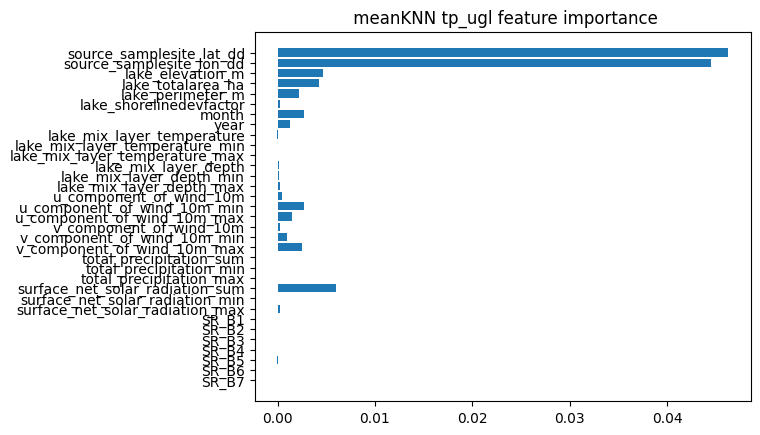

[ 4.63047921e-02  4.45089462e-02  4.65418199e-03  4.26852119e-03
  4.65418199e-03  4.26852119e-03  2.25918129e-03  2.79097823e-04
  2.72208815e-03  1.30468707e-03  6.14840860e-06  6.72260408e-05
  4.59000053e-05  2.06154221e-04  2.10222225e-04  2.94850072e-04
  5.03875521e-04  2.71790669e-03  1.50408107e-03  2.89656299e-04
  1.04274569e-03  2.53608478e-03  8.13145048e-08  0.00000000e+00
  0.00000000e+00  6.03445661e-03  0.00000000e+00  3.09697182e-04
  0.00000000e+00  0.00000000e+00 -1.46142247e-05 -9.12009029e-07
  5.11430880e-06  3.50598787e-08  0.00000000e+00]


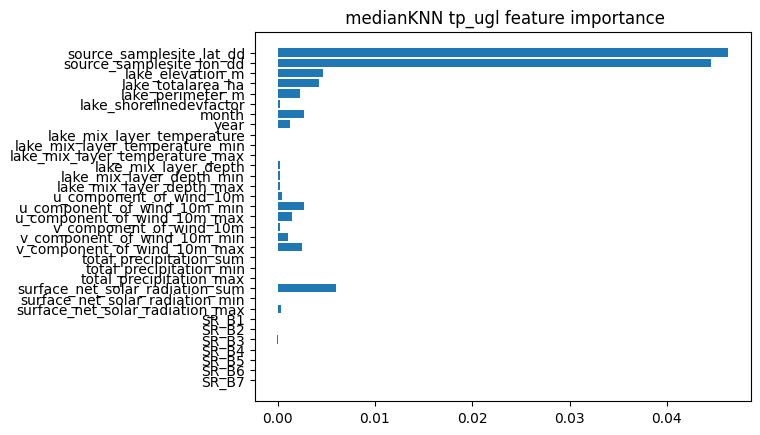

[ 6.38350549e-02  1.46655016e-01  6.93253245e-03  1.35211665e-03
  6.93253245e-03  1.35211665e-03 -1.60288894e-04 -2.84249229e-04
  1.32543882e-03 -8.55140574e-04 -4.47850267e-04 -2.43245534e-04
 -6.52544726e-04 -1.70568491e-03 -1.39021149e-03 -1.13432314e-03
  5.69673407e-04 -1.81569694e-03  9.25968681e-04 -1.04217890e-03
  2.69678943e-04  1.60173497e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.02465148e-03  0.00000000e+00 -1.12141016e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.64924516e-05  1.64924516e-05]


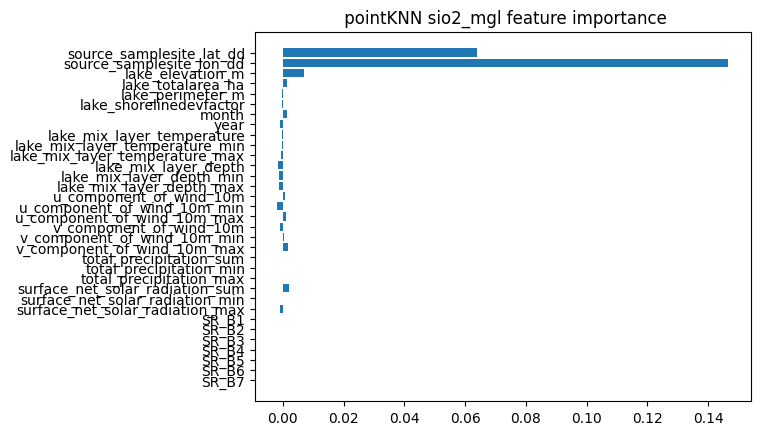

[ 0.06385359  0.1466433   0.00695711  0.00133792  0.00695711  0.00133792
 -0.0001555  -0.00028425  0.00128903 -0.00085514 -0.00043716 -0.00022194
 -0.0006332  -0.0017054  -0.0013956  -0.00111948  0.00056554 -0.00182637
  0.00093438 -0.00103559  0.00025966  0.00156628  0.          0.
  0.          0.00199688  0.         -0.00111043  0.          0.
  0.          0.          0.00019791  0.          0.        ]


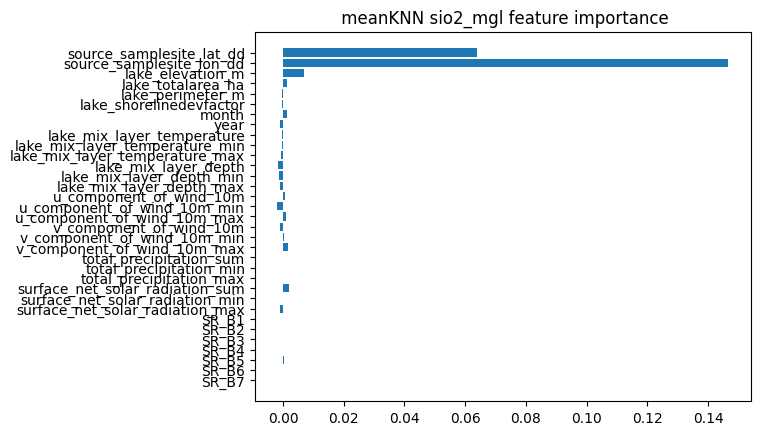

[ 0.06385296  0.14664309  0.00694019  0.00133789  0.00694019  0.00133789
 -0.00015134 -0.00028425  0.00132544 -0.00085514 -0.00044782 -0.00022671
 -0.00065212 -0.0017054  -0.00138881 -0.00112891  0.0005724  -0.00182906
  0.00093106 -0.00102917  0.00024804  0.00159514  0.          0.
  0.          0.00200764  0.         -0.00112148  0.          0.
  0.          0.          0.          0.          0.        ]


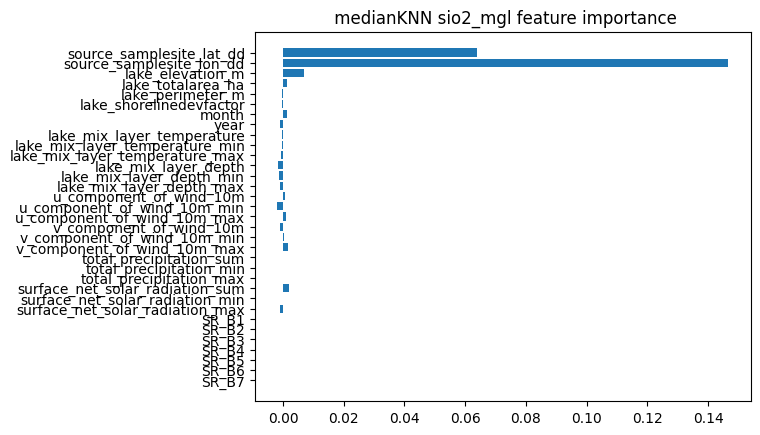

[ 0.16779121  0.18469218  0.1819998   0.01065625  0.1819998   0.01065625
 -0.00036719 -0.00262678  0.05968448  0.02844957 -0.00063908 -0.00059409
 -0.00058259  0.00039726  0.00139548  0.0006522   0.01549146  0.02377829
  0.02001    -0.00732101 -0.0070753   0.02456492  0.          0.
  0.          0.01165137  0.         -0.00033158  0.          0.
  0.          0.          0.          0.          0.        ]


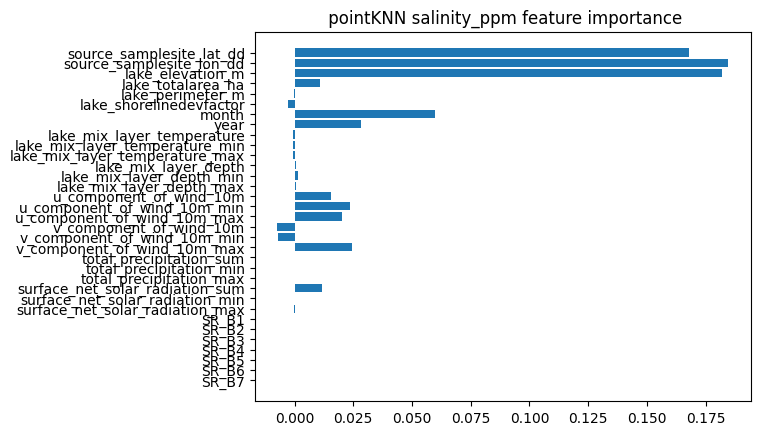

[ 0.16781445  0.18471455  0.1821662   0.01067983  0.1821662   0.01067983
 -0.00037385 -0.00263579  0.05969437  0.02847463 -0.00064005 -0.00059632
 -0.00059131  0.00042291  0.0014166   0.00068754  0.0154887   0.02380063
  0.02003335 -0.00731825 -0.00708665  0.02456288  0.          0.
  0.          0.01151232  0.         -0.00036087  0.          0.
  0.          0.          0.          0.          0.        ]


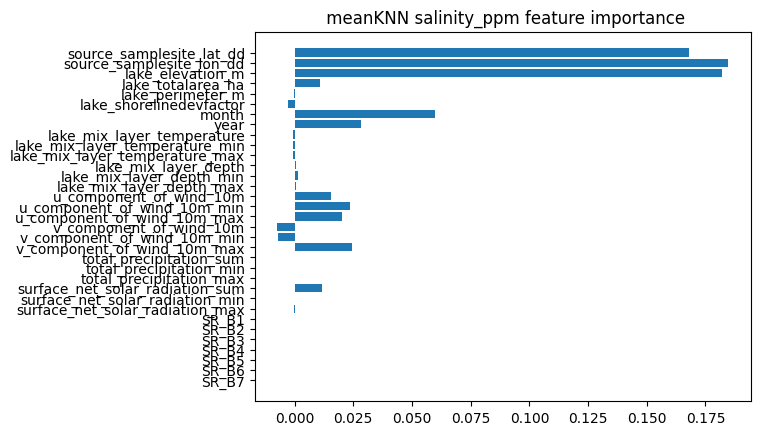

[ 0.16778012  0.18472259  0.18217872  0.01067887  0.18217872  0.01067887
 -0.00037385 -0.00263579  0.05969437  0.02847463 -0.00063935 -0.0005957
 -0.00059131  0.00042291  0.00140675  0.00068754  0.01547212  0.02380063
  0.02003286 -0.00731825 -0.00707913  0.02456245  0.          0.
  0.          0.01151232  0.         -0.00036551  0.          0.
  0.          0.          0.          0.          0.        ]


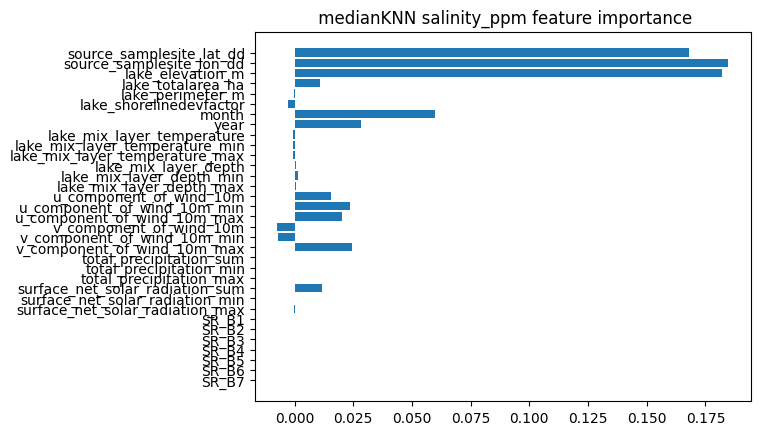

In [19]:
reduction_methods = [' point', ' mean', ' median']
for key in num_to_param.keys():
    for reduction_method in reduction_methods:
        permute_importance(dataset,reduction_method,key, models_1[reduction_method]['train'][key]['KNN']['model'],"KNN")

In [ ]:
models_1